# Introduction
Diabetes is a type of chronic illness where the body does either does not produce enough insulin or the insulin it does produce cannot break down and regulate the sugar levels in the blood. There are two types, type 1 and type 2. Type 1 Diabetes is caused by genetics, environmental triggers or an autoimmune disorder. Whereas type 2 is caused by life style and diet, genetics, race and other factors. Both however lead to the same issue with blood sugar levels. Whichever type you have, it is very deadly. If your blood sugar is too low, it can put you into a coma. If your blood sugar is too high, it is damaging for your body and can cause health issues later on such as, but not limited to, heart attacks or strokes. Identifying someone as diabetic or not is crucial, and diagnosing one as diabetic is not always easy. I know from personal experience, as my aunt fell gravely ill and it took a while to eventually diagnose her with type 1. Multiple times, her blood sugar rose and dropped to dangerous levels, and doctors were stumped for the longest. Finally, she was diagnosed, and has been managing her levels since. But in that time of uncertainty, it was scary. But what if there was a way to diagnose someone, or predict whether a person may develop Diabetes or not? That ability could prove crucial in saving one's life. That will be the goal with this research. Can we use one of my recently learned machine learning algorithms to determine if someone has diabetes or not based on blood readings.  

# Data Loading

The data used for this project comes from https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features. Here Parasi Darabi put together this dataset from another source, she explains her process and how she put this dataset together.

In [4]:
import pandas as pd

diabetes_data = pd.read_csv("diabetes.csv")

diabetes_data.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


# Data Pre-Processing
Check column datatypes and check for any null values. Handle null entries if existant.

### Check Column Dtypes

In [7]:
diabetes_data.dtypes

Age                 int64
Gender              int64
BMI               float64
SBP                 int64
DBP                 int64
FPG               float64
Chol              float64
Tri               float64
HDL               float64
LDL               float64
ALT               float64
BUN               float64
CCR               float64
FFPG              float64
smoking           float64
drinking          float64
family_histroy      int64
Diabetes            int64
dtype: object

All columns are in numeric type, will be easy to handle later on in our algorithms.

### Check for null entries

In [10]:
print(diabetes_data.isnull().sum())

Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64


As we can see, all columns have filled data. So there is no need to fill/remove null entries and rows.

### Data column Understanding

**Age**: How old the person is <br>
**Gender**: What sex our person is (1=male 2=female) <br> 
**BMI**: Body Mass Index, a tool used to measure weight based on body size/height and gender. <br> 
**SBP** (Systolic Blood Pressure): This measures the pressure your blood exerts onto your artery walls while the heart pumps. <br> 
**DBP** (Diastolic Blood Pressure): This measures the pressure your blood is exerting against your artery walls while the heart is at rest/inbetween pumps. <br>
**FPG** (Fasting Plasma Glucose): This is your fasting plasma glucose. This measures the amount of glucose in your body while you have not eaten, or fasted. <br>
**Chol** (Cholesterol): Overall cholesterol level. Too high can cause cardiovascular issues and too low can cause issues in your body creating new cells or vitamins and hormones. 2 types, LDL and HDL <br>
**Tri** (Triglyceride): A type of fat/lipid found in the body. High Triglyceride levels are linked to heart disease. Tends to be stored in fat cells. <br>
**HDL** (High-Density Lipoprotein): Considered the good cholesterol. Helps remove other forms of cholesterol from the body. High levels of HDL linked to lower chances of heart disease. <br>
**LDL** (Low-Density Lipoprotein): The bad cholesterol. High amounts of LDL can build up plaque in the arteries, causing them to become narrower and increase chances of heart disease and strokes. <br>
**ALT** (Alanine Aminotransferase): Used to break down food into energy. Also a good indicator on liver health and function. <br>
**BUN** (Blood urea nitrogen): Measures the amount of urea nitrogen in your blood. This can be used to see how well your kidney's are working. <br>
**CCR** (Creatinine Clearance): This tests your kidneys function by looking at the amount of creatine in your blood and urine. Creatine itself is what your body uses to supply your muscles with energy. Higher levels of creatine can show kidneys are not functioning correctly. <br>
**FFPG** (Final Fasting Plasma Glucose): Very similar to FPG. <br>
**Smoking**: This indicates individuals smoking history. 1: Current Smoker. 2: Ever Smoker. 3: Never Smoker. <br>
**Drinking**: This indicates individuals drinking history. 1: Current Drinker. 2: Ever Drinker. 3: Never Drinker. <br>
**Family History**: Does the family have history with diabetes? 1. Yes. 2. No. <br>
**Diabetes**: 1 if the person has diabetes 0 if not.

Sources: <br> https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings <br>
https://medlineplus.gov/ency/imagepages/19723.htm <br>
https://www.heart.org/en/health-topics/cholesterol/about-cholesterol <br> 
https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/in-depth/hdl-cholesterol/art-20046388 <br> 
https://www.webmd.com/digestive-disorders/alanine-aminotransferase-test <br>
https://www.mayoclinic.org/tests-procedures/blood-urea-nitrogen/about/pac-20384821 <br> 
https://my.clevelandclinic.org/health/diagnostics/16380-creatinine-clearance-test <br>

# Data Visualization
Here, I will look to see if there are any trends that seemed linked, in doing so hope to gain insight if there are connections in the data to the prediction.

In [16]:
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np

### Diabetes Count For Gender

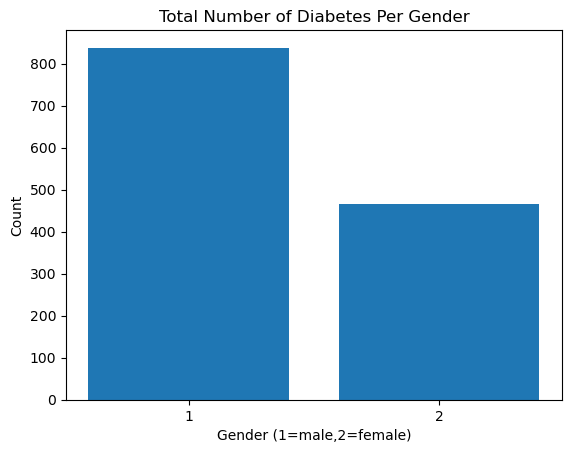

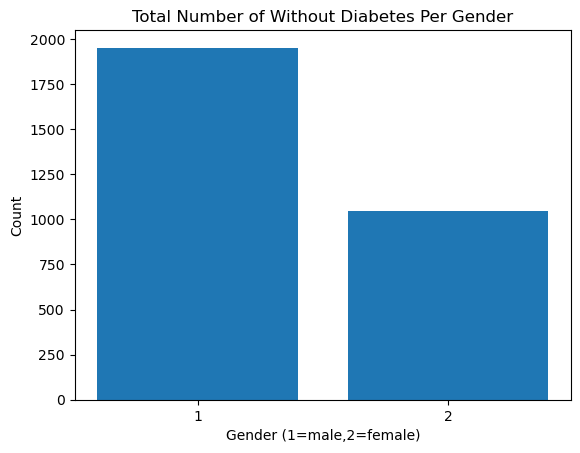

In [18]:
total_diabetes_per_gender = diabetes_data[diabetes_data['Diabetes']==1]
total_diabetes_per_gender = total_diabetes_per_gender.groupby('Gender').size()
#plt.figure(figsize=(12,6))
plt.title('Total Number of Diabetes Per Gender')
plt.ylabel('Count')
plt.xlabel('Gender (1=male,2=female)')
plt.xticks(np.arange(0, max(total_diabetes_per_gender.values) + 1, 1))
plt.bar(x=total_diabetes_per_gender.index,height=total_diabetes_per_gender.values)
plt.show()
#without diabetes
total_without_per_gender = diabetes_data[diabetes_data['Diabetes']==0]
total_without_per_gender = total_without_per_gender.groupby('Gender').size()
#plt.figure(figsize=(12,6))
plt.title('Total Number of Without Diabetes Per Gender')
plt.ylabel('Count')
plt.xlabel('Gender (1=male,2=female)')
plt.xticks(np.arange(0, max(total_without_per_gender.values) + 1, 1))
plt.bar(x=total_without_per_gender.index,height=total_without_per_gender.values)
plt.show()

We see that there appears to overall be more males then females in the database. Also, the split seems relatively the same. As a result, I think its fair to conclude that we will not need to use gender as a feature for our models later on.

### BMI With and Without Diabetes

In [21]:
bmi = diabetes_data[['BMI','Diabetes']]

bmi

,BMI,Diabetes
0,20.1,0
1,17.7,0
2,19.7,0
3,23.1,0
4,26.5,0
...,...,...
4298,23.4,1
4299,22.3,1
4300,24.6,1
4301,29.0,1


<Axes: title={'center': 'BMI Without Diabetes'}, xlabel='BMI', ylabel='Total Number of People'>

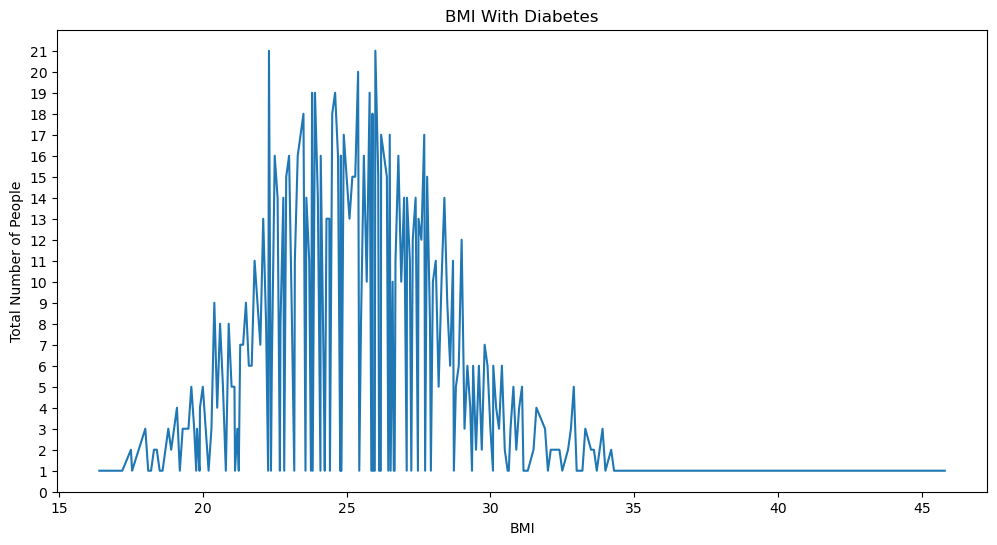

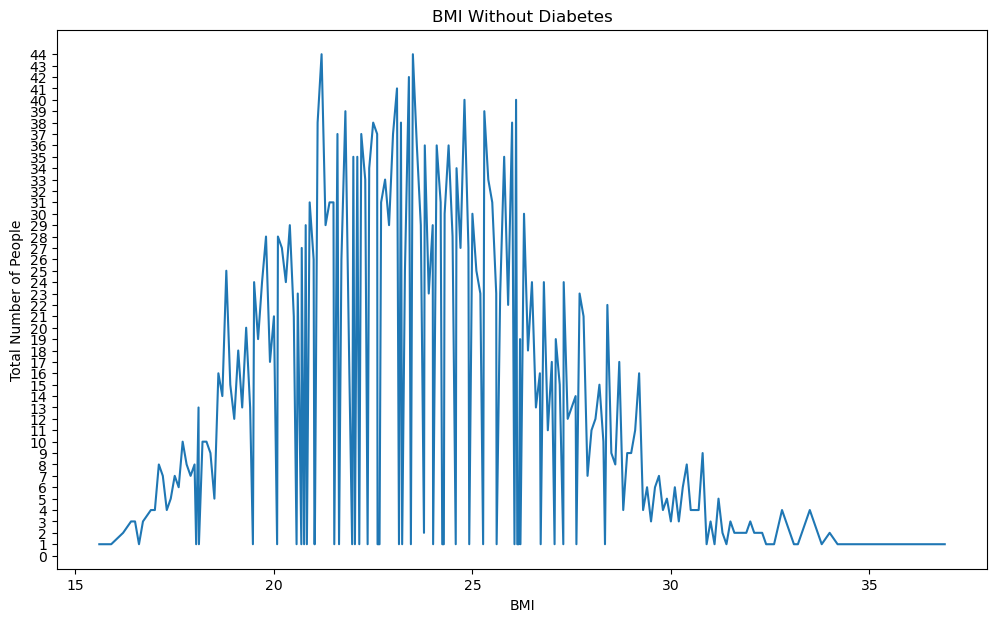

In [22]:
bmi_with_diabetes = bmi[bmi['Diabetes']==1].groupby('BMI').size()
bmi_without_diabetes = bmi[bmi['Diabetes']==0].groupby('BMI').size()

plt.figure(figsize=(12,6))
plt.title('BMI With Diabetes')
plt.ylabel('Total Number of People')
plt.yticks(np.arange(0, max(bmi_with_diabetes.values) + 1, 1))
bmi_with_diabetes.plot(kind='line')

plt.figure(figsize=(12,7))
plt.title('BMI Without Diabetes')
plt.ylabel('Total Number of People')
plt.yticks(np.arange(0, max(bmi_without_diabetes.values) + 1, 1))
bmi_without_diabetes.plot(kind='line')

We see with BMI for people with and without diabetes, it seems for both most occur around or just below 25 BMI. As a result, I do not believe there will be a great enough distinction to use BMI for our models

### SBP Levels With and Without Diabetes

<Axes: title={'center': 'SBP Levels Count for People Without Diabetes'}, xlabel='SBP', ylabel='Total Number of People'>

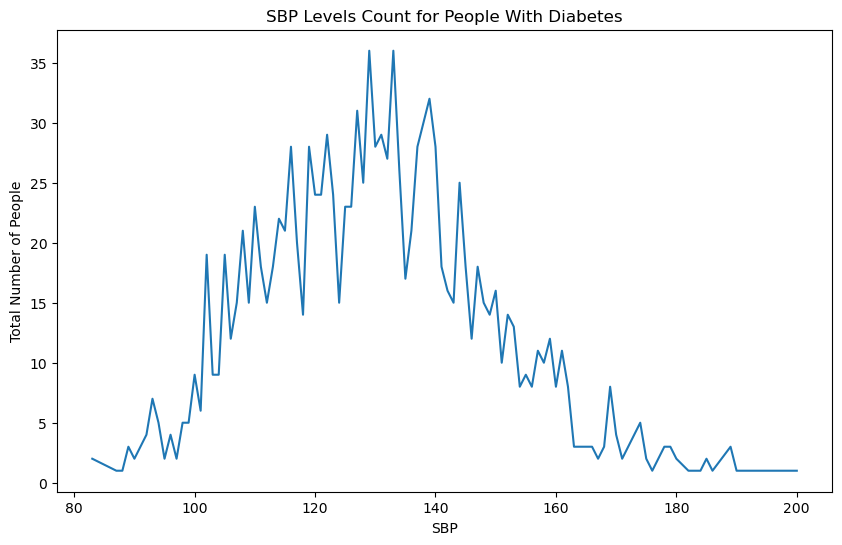

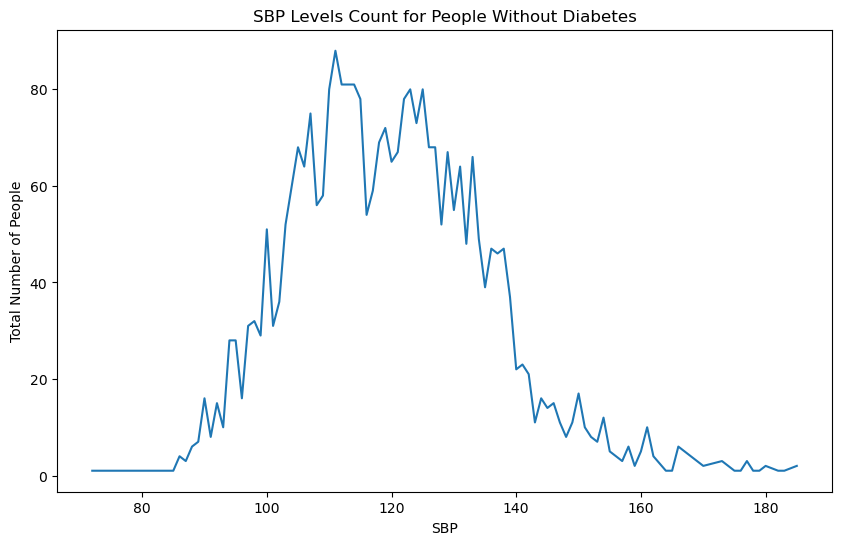

In [25]:
sbp_levels_with_diabetes = diabetes_data[diabetes_data['Diabetes']==1].groupby('SBP').size()

plt.figure(figsize=(10,6))
plt.title('SBP Levels Count for People With Diabetes')
plt.xlabel('SBP Level')
plt.ylabel('Total Number of People')
sbp_levels_with_diabetes.plot(kind='line')

sbp_levels_without_diabetes = diabetes_data[diabetes_data['Diabetes']==0].groupby('SBP').size()

plt.figure(figsize=(10,6))
plt.title('SBP Levels Count for People Without Diabetes')
plt.xlabel('SBP Level')
plt.ylabel('Total Number of People')
sbp_levels_without_diabetes.plot(kind='line')

We see with SBP (Systolic Blood Pressure) that there is a difference between people with and without diabetes. With people with Diabetes, the graph appears to be normally distributed centered around 130 level. With people without diabetes, it appears most people center around 115-125. So there is a slight increase in SBP levels with those with diabetes.

### DBP Level Counts With and Without Diabetes

<Axes: title={'center': 'DBP Levels Count for People Without Diabetes'}, xlabel='DBP', ylabel='Total Number of People'>

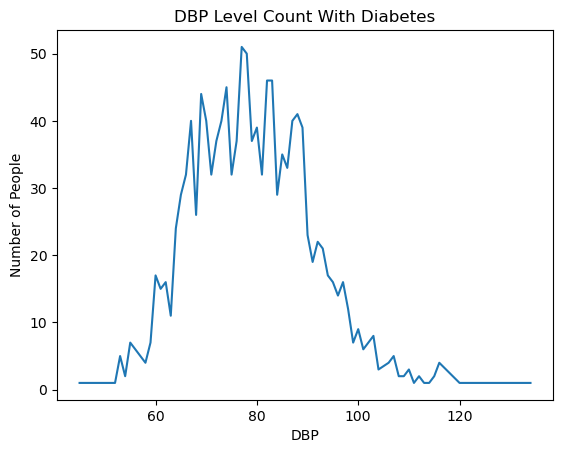

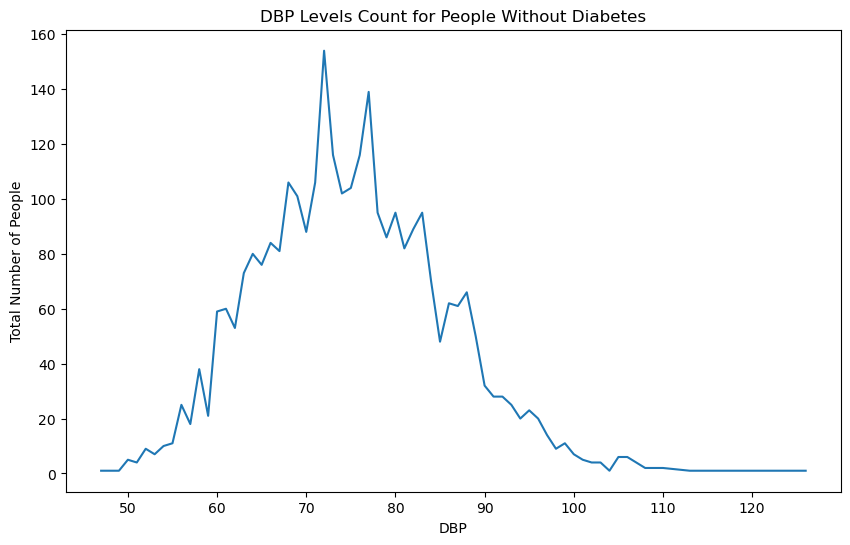

In [28]:
dbp_with_diabetes = diabetes_data[diabetes_data['Diabetes']==1].groupby('DBP').size()

plt.figure(figure=(10,6))
plt.title('DBP Level Count With Diabetes')
plt.xlabel('DBP Levels')
plt.ylabel('Number of People')
dbp_with_diabetes.plot(kind='line')

dbp_without_diabetes = diabetes_data[diabetes_data['Diabetes']==0].groupby('DBP').size()

plt.figure(figsize=(10,6))
plt.title('DBP Levels Count for People Without Diabetes')
plt.xlabel('DBP Level')
plt.ylabel('Total Number of People')
dbp_without_diabetes.plot(kind='line')

With DBP (Diastolic Blood Pressure), I believe we see a very slight difference between people with and without diabetes. For people with diabetes, it appears to be normally distributes around just below 80. As people without diabetes it appears to be centered around low 70s. Its a slight difference, but could be used potentially for models later on.

### FPG Level Counts With and Without Diabetes 

<BarContainer object of 315 artists>

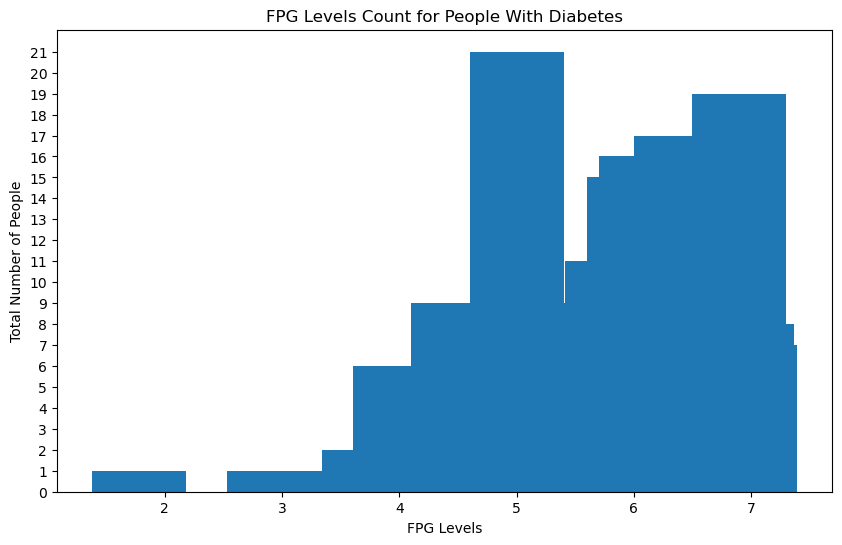

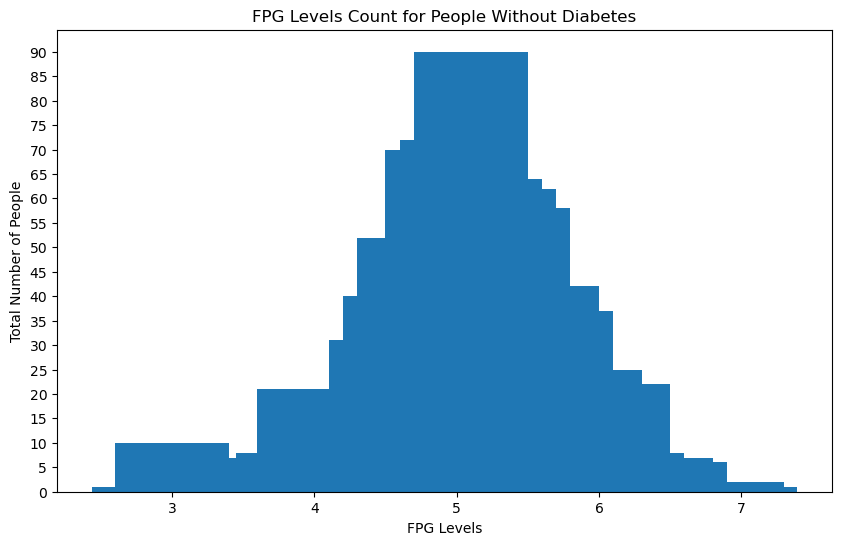

In [31]:
fpg_with_diabetes = diabetes_data[diabetes_data['Diabetes']==1].groupby('FPG').size()

plt.figure(figsize=(10,6))
plt.title('FPG Levels Count for People With Diabetes')
plt.ylabel('Total Number of People')
plt.xlabel('FPG Levels')
plt.yticks(np.arange(0, max(fpg_with_diabetes.values) + 1, 1))
plt.bar(x=fpg_with_diabetes.index,height=fpg_with_diabetes)

fpg_without_diabetes = diabetes_data[diabetes_data['Diabetes']==0].groupby('FPG').size()

plt.figure(figsize=(10,6))
plt.title('FPG Levels Count for People Without Diabetes')
plt.ylabel('Total Number of People')
plt.xlabel('FPG Levels')
plt.yticks(np.arange(0, max(fpg_without_diabetes.values) + 1, 5))
plt.bar(x=fpg_without_diabetes.index,height=fpg_without_diabetes.values)

For FPG (Fasting Plasma Glucose), we see that people with diabetes the graph appears to be rightly skewed starting around level 5 whereas for people without diabetes it appears to be more normally distributed around level 5. This could be a good feature to use for our models. As people with higher FPG levels could potentially be more likely to be diabetic based on our data

### Cholesterol Levels With and Without Diabetes

<BarContainer object of 442 artists>

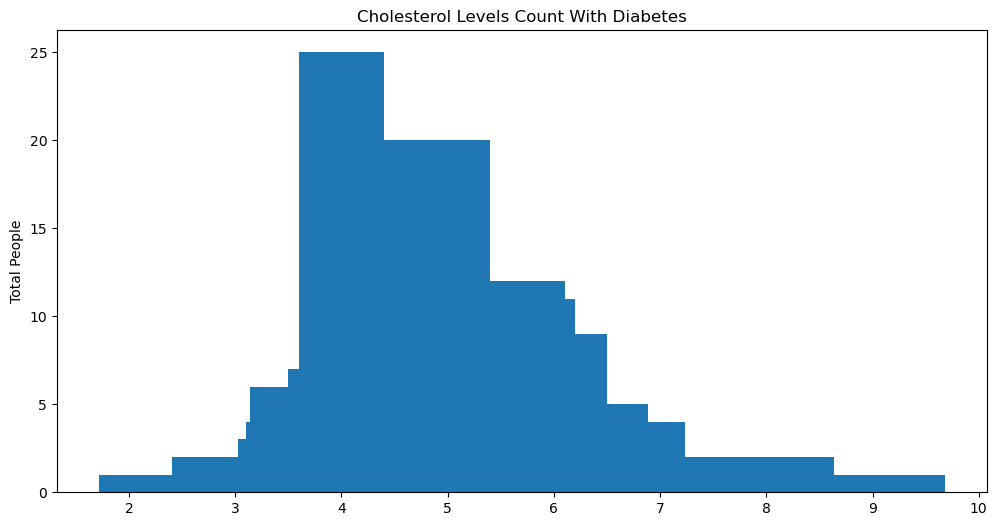

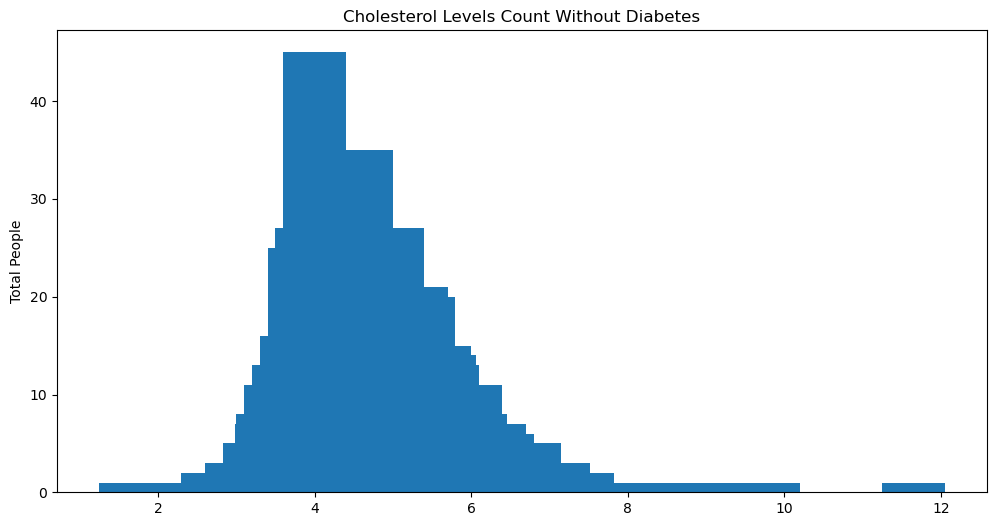

In [34]:
chl_level_with_diabetes = diabetes_data[diabetes_data['Diabetes']==1].groupby('Chol').size()

plt.figure(figsize=(12,6))
plt.title('Cholesterol Levels Count With Diabetes')
plt.ylabel('Total People')
plt.bar(x=chl_level_with_diabetes.index,height=chl_level_with_diabetes.values)

chl_level_without_diabetes = diabetes_data[diabetes_data['Diabetes']==0].groupby('Chol').size()

plt.figure(figsize=(12,6))
plt.title('Cholesterol Levels Count Without Diabetes')
plt.ylabel('Total People')
plt.bar(x=chl_level_without_diabetes.index,height=chl_level_without_diabetes.values)

For Cholesterol, it appears these graphs are very similar between people with and without diabetes. We see both graphs peak at and then are slightly skewed to the right. As a result, I believe cholesterol may not be the best to use for our models when predicting diabetes.

### Triglyceride Levels Count With and Without Diabetes

<BarContainer object of 408 artists>

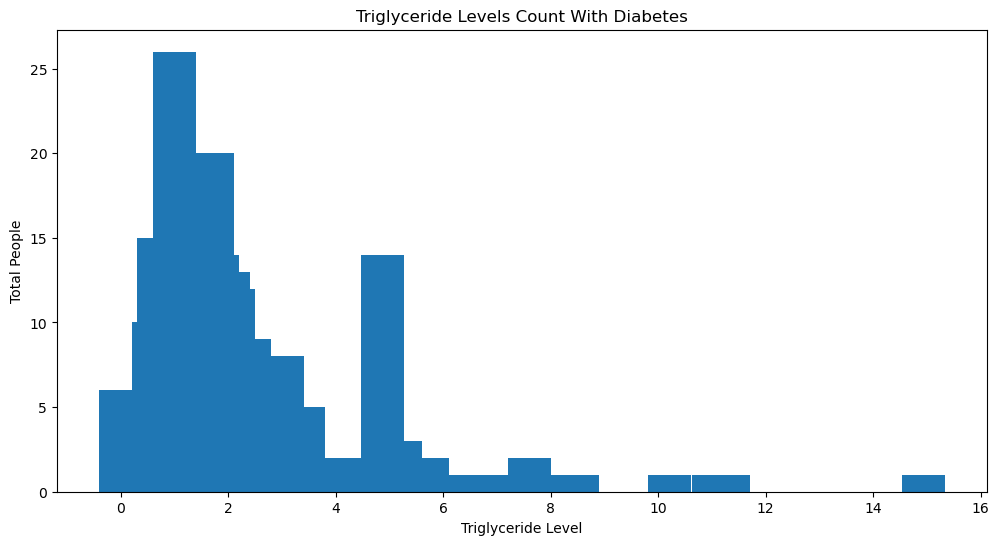

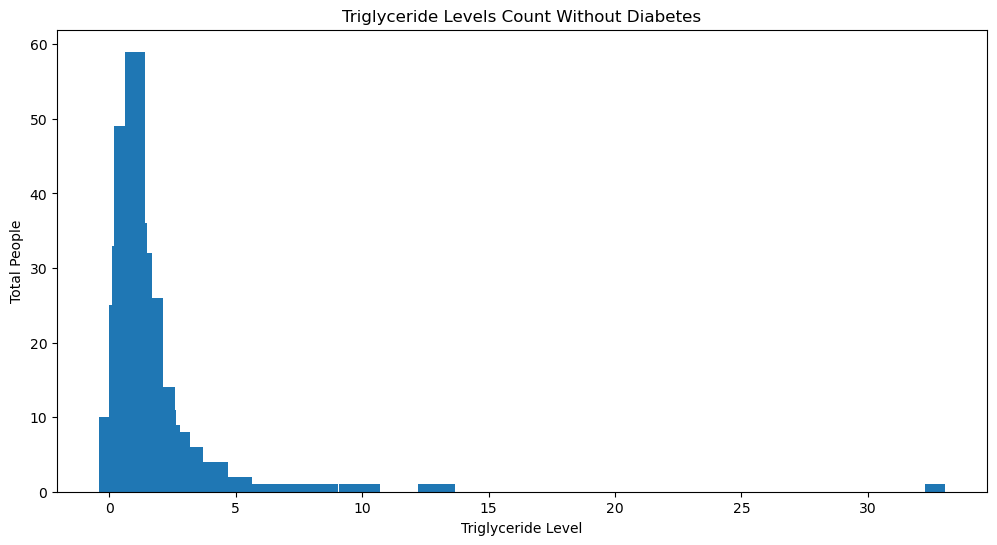

In [37]:
tri_with_diabetes = diabetes_data[diabetes_data['Diabetes']==1].groupby('Tri').size()

plt.figure(figsize=(12,6))
plt.title('Triglyceride Levels Count With Diabetes')
plt.ylabel('Total People')
plt.xlabel('Triglyceride Level')
plt.bar(x=tri_with_diabetes.index,height=tri_with_diabetes.values)

tri_without_diabetes = diabetes_data[diabetes_data['Diabetes']==0].groupby('Tri').size()

plt.figure(figsize=(12,6))
plt.title('Triglyceride Levels Count Without Diabetes')
plt.ylabel('Total People')
plt.xlabel('Triglyceride Level')
plt.bar(x=tri_without_diabetes.index,height=tri_without_diabetes.values)

With triglyceride levels, the graphs are nearly identical. They are skewed to the left appearing to peak around level 2. With diabetes there appears to be a slight spike around 4, but something like this could be data dependent and lead to overfitting. As a result, it may be best to avoid this feature when modeling as it could lead to overfitting if it lets a TRI level of 4 dictate a result.

### HDL Level Count With and Without Diabetes

<BarContainer object of 183 artists>

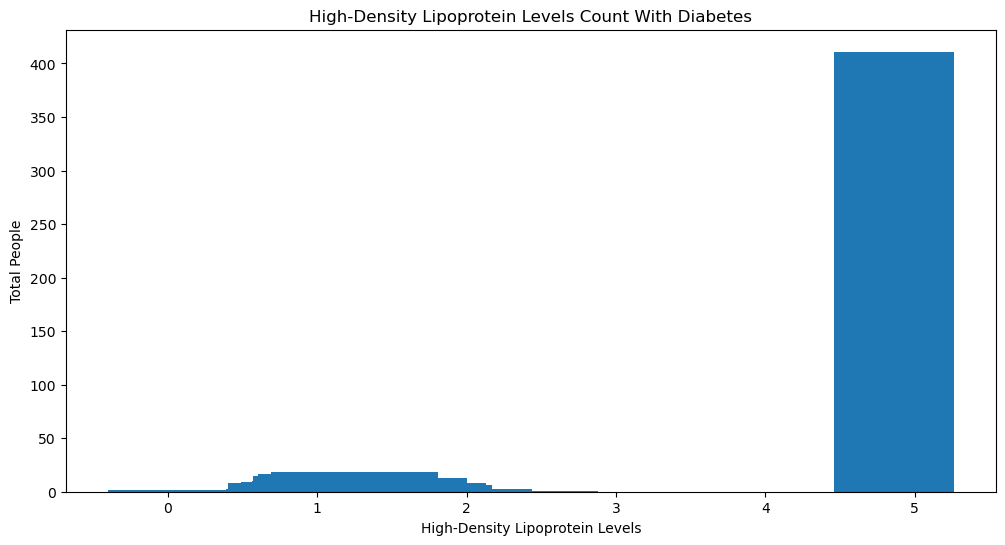

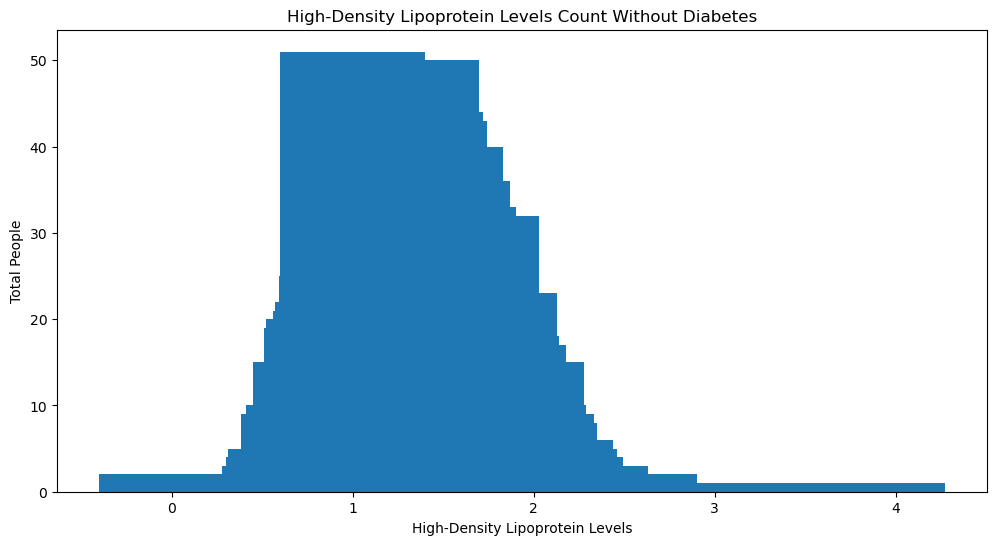

In [40]:
hdl_count_with_diabetes = diabetes_data[diabetes_data['Diabetes']==1].groupby('HDL').size()

plt.figure(figsize=(12,6))
plt.title('High-Density Lipoprotein Levels Count With Diabetes')
plt.ylabel('Total People')
plt.xlabel('High-Density Lipoprotein Levels')
plt.bar(x=hdl_count_with_diabetes.index,height=hdl_count_with_diabetes.values)

hdl_count_without_diabetes = diabetes_data[diabetes_data['Diabetes']==0].groupby('HDL').size()

plt.figure(figsize=(12,6))
plt.title('High-Density Lipoprotein Levels Count Without Diabetes')
plt.ylabel('Total People')
plt.xlabel('High-Density Lipoprotein Levels')
plt.bar(x=hdl_count_without_diabetes.index,height=hdl_count_without_diabetes.values)

HDL (High-Density Lipoprotein) appears to be a good feature to use for our models. For a vast majority of people with diabetes, it appears that their HDL level is around 5, whereas people without have an HDL level generally below 2. This could be a strong marker to use for our models. 

### Low-Density Lipoprotein Counts With and Without Diabetes

<Axes: title={'center': 'Low-Density Lipoprotien Total Count Without Diabetes'}, xlabel='LDL Level', ylabel='Total Number of People'>

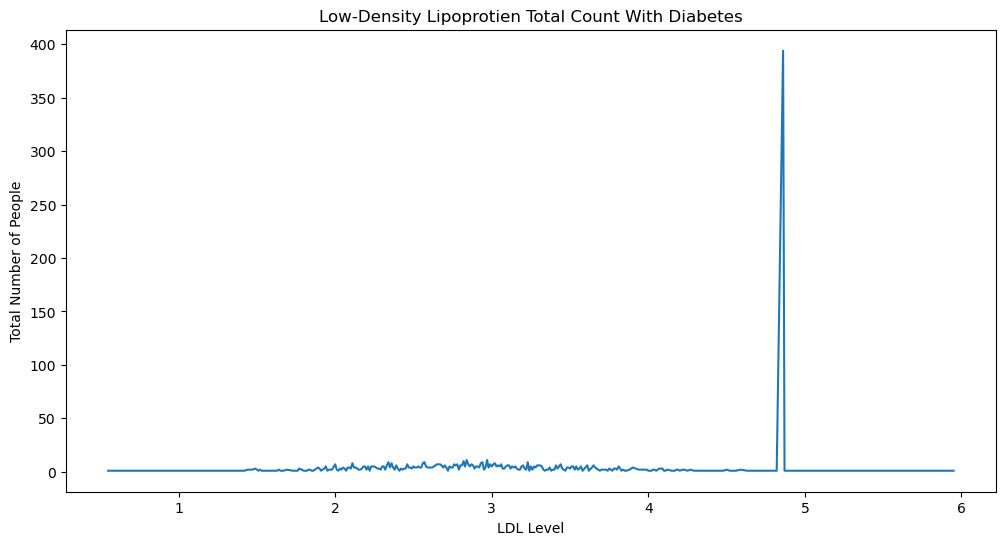

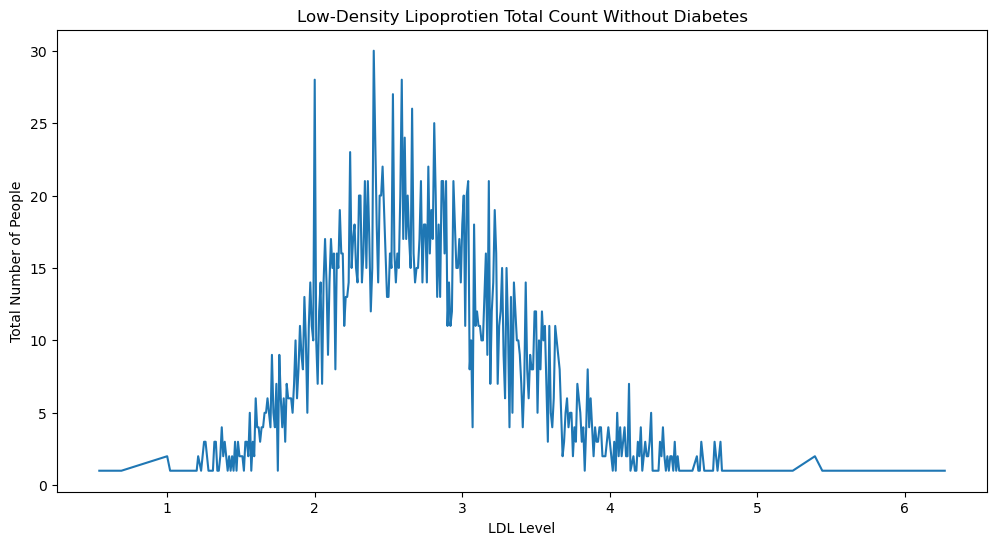

In [43]:
ldl_count_with_diabetes = diabetes_data[diabetes_data['Diabetes']==1].groupby('LDL').size().reset_index(name='count')

plt.figure(figsize=(12,6))
plt.title('Low-Density Lipoprotien Total Count With Diabetes')
plt.xlabel('LDL Level')
plt.ylabel('Total Number of People')
sbn.lineplot(x='LDL',y='count',data=ldl_count_with_diabetes)

ldl_count_without_diabetes = diabetes_data[diabetes_data['Diabetes']==0].groupby('LDL').size().reset_index(name='count')

plt.figure(figsize=(12,6))
plt.title('Low-Density Lipoprotien Total Count Without Diabetes')
plt.xlabel('LDL Level')
plt.ylabel('Total Number of People')
sbn.lineplot(x='LDL',y='count',data=ldl_count_without_diabetes)

For LDL (Low-Density Lipoprotein), there again appears to be a strong trend. Majority people with diabetes appear to have an LDL level of just below 5, whereas people without diabetes have a normally distributed trend centered just below 3. This could also be a strong statistic to use in our model.

### Alanine Aminotransferase Level With and Without Diabetes

<Axes: title={'center': 'Alanine Aminotransferase Total Count Without Diabetes'}, xlabel='ALT Level', ylabel='Total Number of People'>

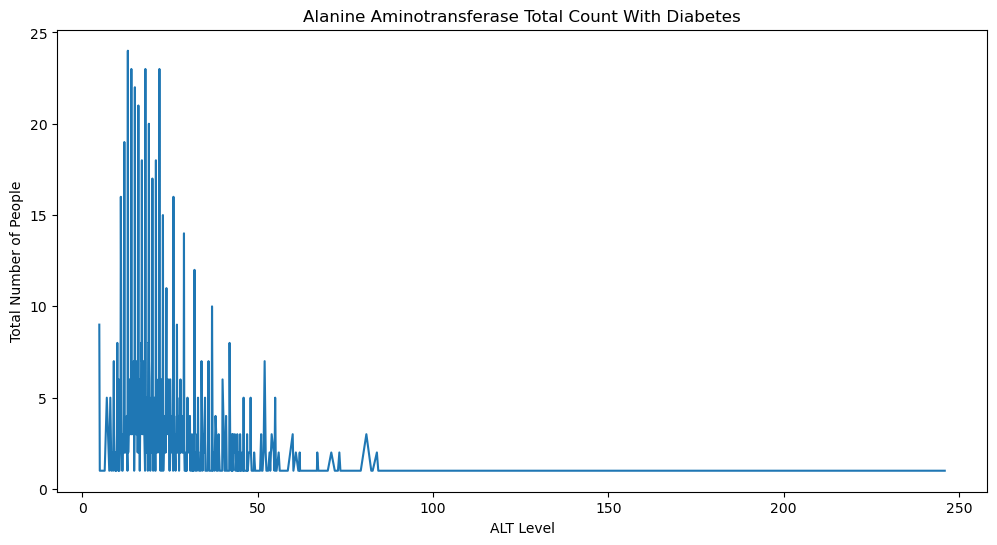

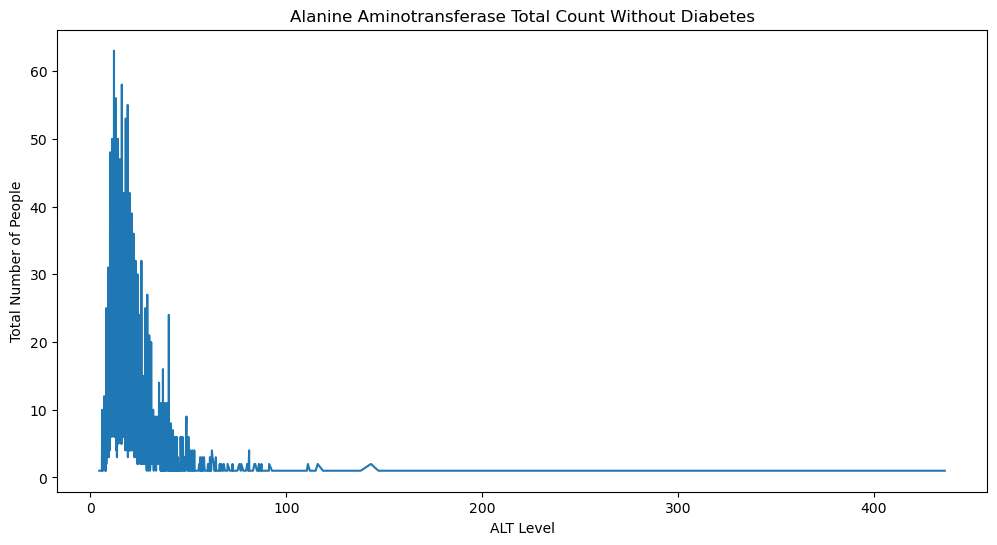

In [46]:
alt_with_diabetes = diabetes_data[diabetes_data['Diabetes']==1].groupby('ALT').size().reset_index(name='count')

plt.figure(figsize=(12,6))
plt.title('Alanine Aminotransferase Total Count With Diabetes')
plt.xlabel('ALT Level')
plt.ylabel('Total Number of People')
sbn.lineplot(x='ALT',y='count',data=alt_with_diabetes)

alt_without_diabetes = diabetes_data[diabetes_data['Diabetes']==0].groupby('ALT').size().reset_index(name='count')

plt.figure(figsize=(12,6))
plt.title('Alanine Aminotransferase Total Count Without Diabetes')
plt.xlabel('ALT Level')
plt.ylabel('Total Number of People')
sbn.lineplot(x='ALT',y='count',data=alt_without_diabetes)

With ALT (Alanine Aminotransferase) there appears to be no difference between people with and without diabetes. Both are left skewed graphs with majority being below 50 ALT level. As a result, probably not a good feature to use for our model.

### Blood Urea Nitrogen Level Count With and Without Diabetes

<Axes: title={'center': 'Blood Urea Nitrogen Total Count Without Diabetes'}, xlabel='BUN Level', ylabel='Total Number of People'>

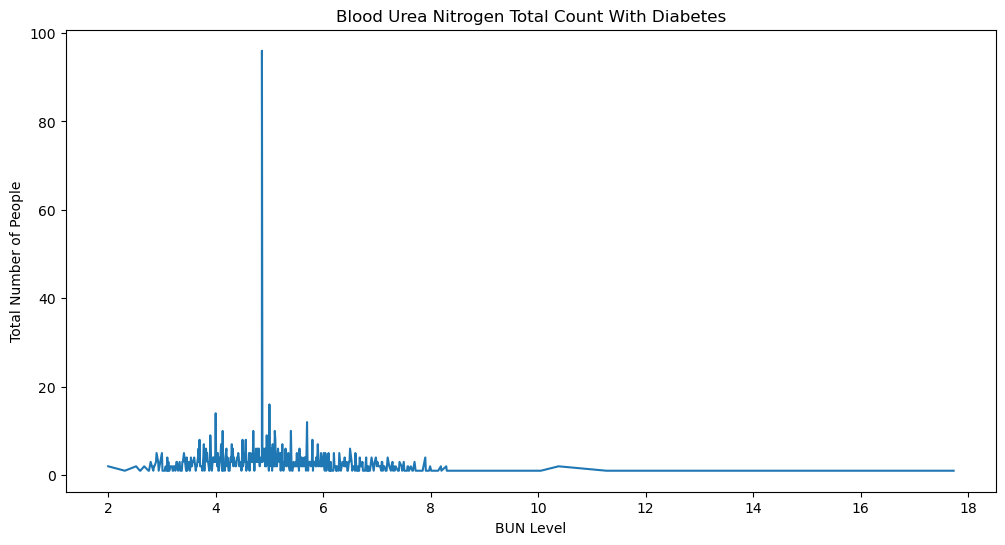

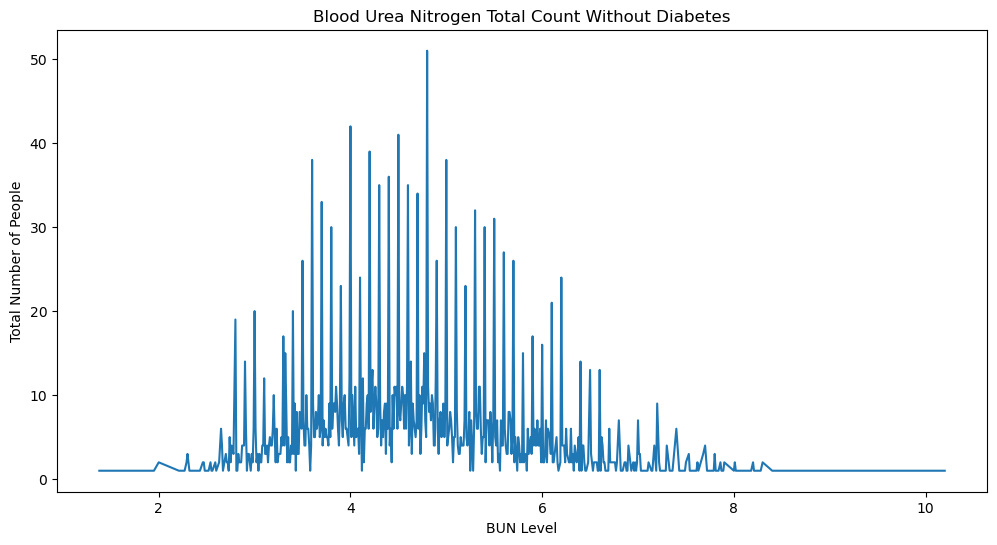

In [49]:
bun_with_diabetes = diabetes_data[diabetes_data['Diabetes']==1].groupby('BUN').size().reset_index(name='count')

plt.figure(figsize=(12,6))
plt.title('Blood Urea Nitrogen Total Count With Diabetes')
plt.xlabel('BUN Level')
plt.ylabel('Total Number of People')
sbn.lineplot(x='BUN',y='count',data=bun_with_diabetes)

bun_without_diabetes = diabetes_data[diabetes_data['Diabetes']==0].groupby('BUN').size().reset_index(name='count')

plt.figure(figsize=(12,6))
plt.title('Blood Urea Nitrogen Total Count Without Diabetes')
plt.xlabel('BUN Level')
plt.ylabel('Total Number of People')
sbn.lineplot(x='BUN',y='count',data=bun_without_diabetes)

For BUN (Blood urea nitrogen) there appears to be insignificant difference between people with and without diabetes. Both models seem to close in on the same value, as a result it is probably best based on this data to not use BUN in our classification models.

### Creatinine Clearance Level Count With and Without Diabetes

<BarContainer object of 633 artists>

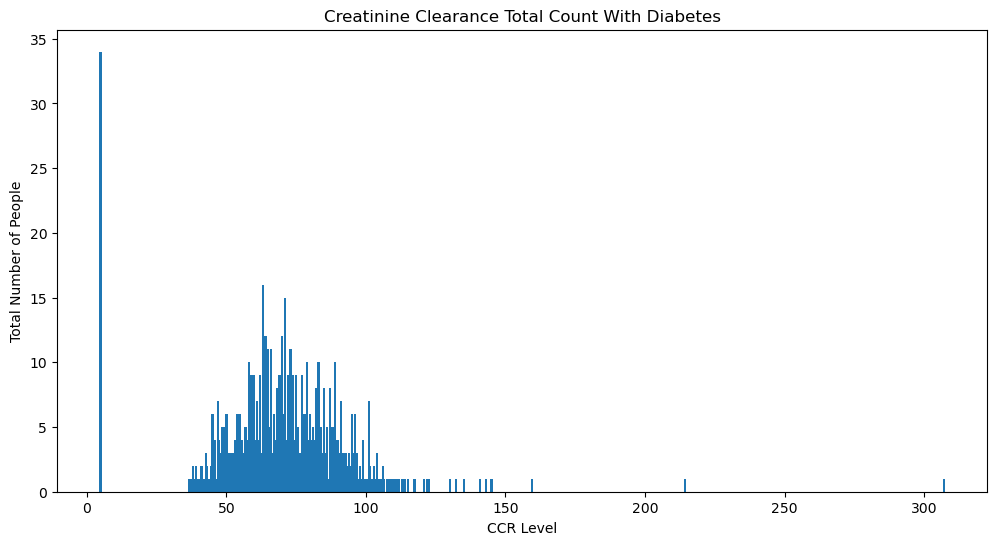

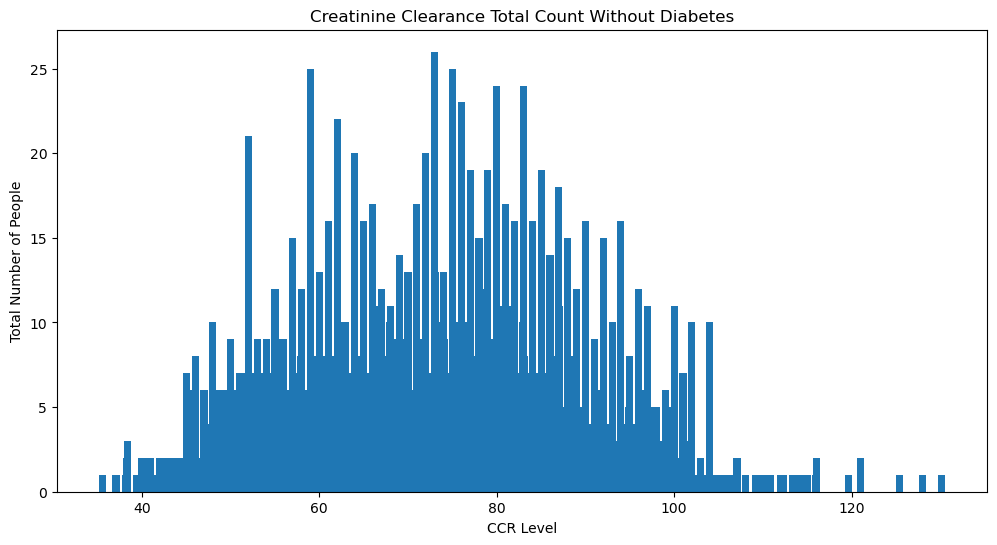

In [52]:
ccr_with_diabetes = diabetes_data[diabetes_data['Diabetes']==1].groupby('CCR').size()

plt.figure(figsize=(12,6))
plt.title('Creatinine Clearance Total Count With Diabetes')
plt.xlabel('CCR Level')
plt.ylabel('Total Number of People')
plt.bar(x=ccr_with_diabetes.index,height=ccr_with_diabetes.values)

ccr_without_diabetes = diabetes_data[diabetes_data['Diabetes']==0].groupby('CCR').size()

plt.figure(figsize=(12,6))
plt.title('Creatinine Clearance Total Count Without Diabetes')
plt.xlabel('CCR Level')
plt.ylabel('Total Number of People')
plt.bar(x=ccr_without_diabetes.index,height=ccr_without_diabetes.values)

For CCR (Creatine Clearance) levels both graphs seems to be distributed the same among equal values. Majority seem to be between 40-100. Although people with diabetes have a weird spike close to 0, that could be a result of our data and not in actuality and could lead to overfitting. As a result, I believe that CCR would not be a good feature to use for our model.

### Final Fasting Plasma Glucose Level Count With and Without Diabetes

<BarContainer object of 283 artists>

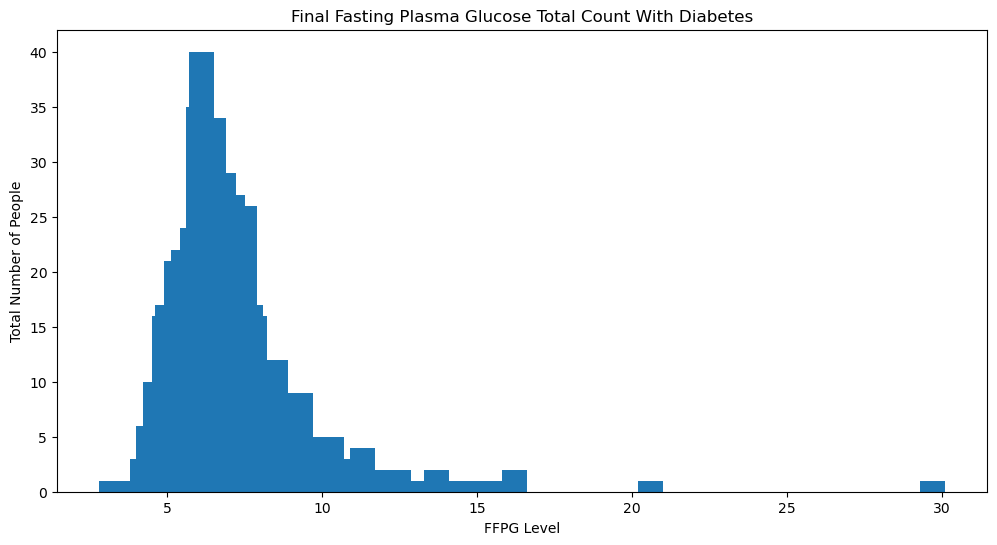

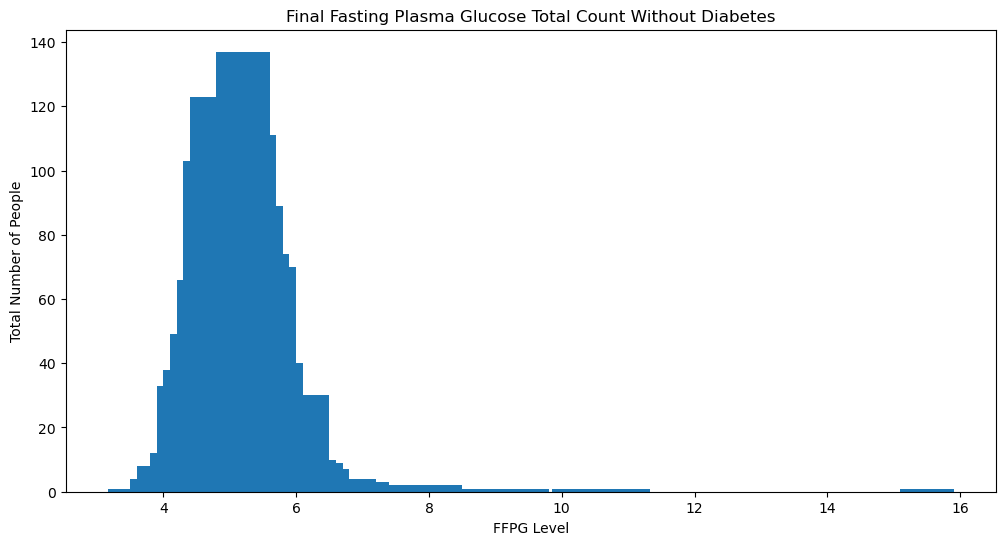

In [55]:
ffpg_with_diabetes = diabetes_data[diabetes_data['Diabetes']==1].groupby('FFPG').size()

plt.figure(figsize=(12,6))
plt.title('Final Fasting Plasma Glucose Total Count With Diabetes')
plt.xlabel('FFPG Level')
plt.ylabel('Total Number of People')
plt.bar(x=ffpg_with_diabetes.index,height=ffpg_with_diabetes.values)

ffpg_without_diabetes = diabetes_data[diabetes_data['Diabetes']==0].groupby('FFPG').size()

plt.figure(figsize=(12,6))
plt.title('Final Fasting Plasma Glucose Total Count Without Diabetes')
plt.xlabel('FFPG Level')
plt.ylabel('Total Number of People')
plt.bar(x=ffpg_without_diabetes.index,height=ffpg_without_diabetes.values)

For FFPG (Final Fasting Plasma Glucose) level, these graphs seem relatively similar. The only difference is that while people without diabtes center between 5 and 6 and dont really go over, people with diabetes majority of their levels appear to be at 6 or 7 and contain more people with higher levels. So while the graphs look somewhate similar, the data and values where the graphs form appear to have a large enough difference to be able to differentiate between people with and without. As a result I believe FFPG will be a good feature to use for our predictive models.

### Smoking Level Count With and Without Diabetes

<BarContainer object of 3 artists>

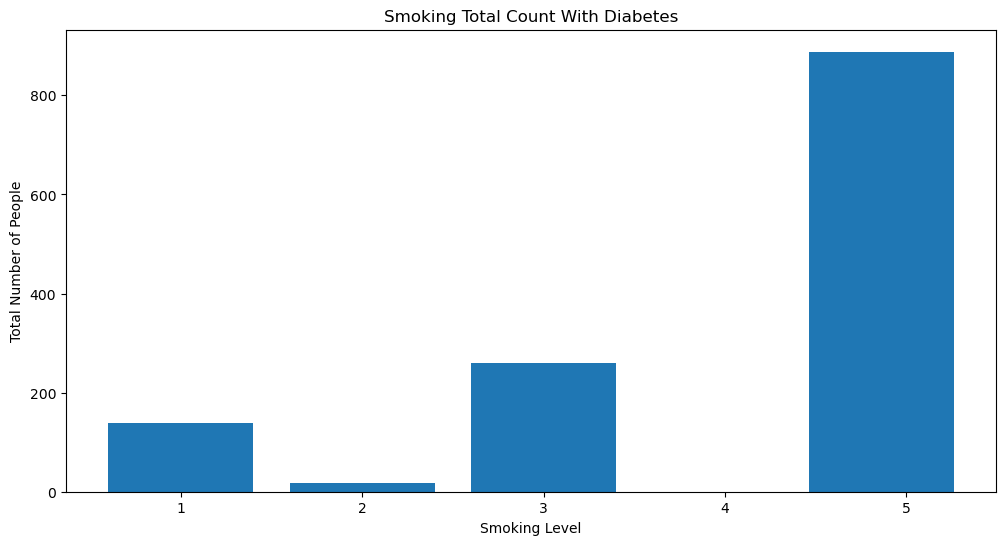

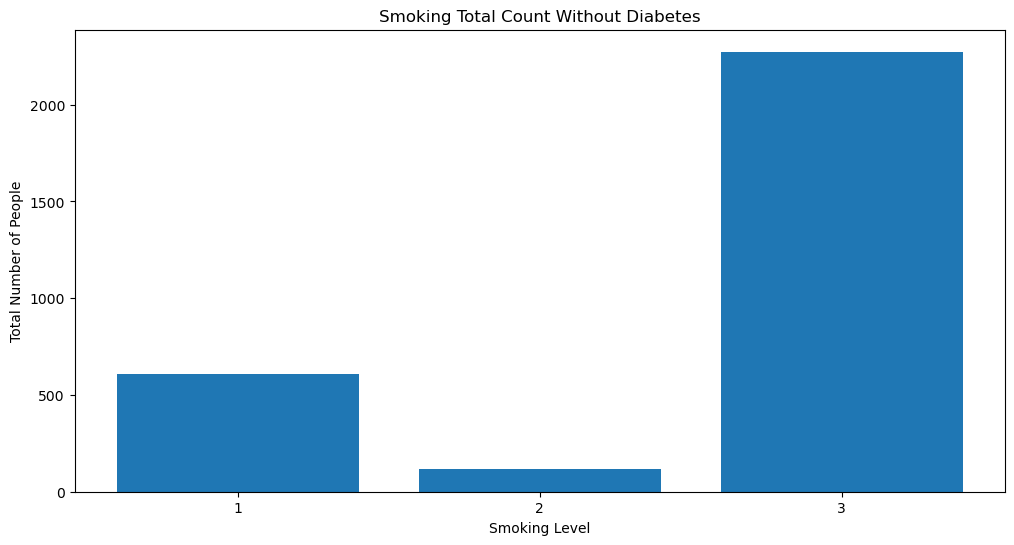

In [58]:
smoking_with_diabetes = diabetes_data[diabetes_data['Diabetes']==1].groupby('smoking').size()

plt.figure(figsize=(12,6))
plt.title('Smoking Total Count With Diabetes')
plt.xlabel('Smoking Level')
plt.ylabel('Total Number of People')
plt.bar(x=smoking_with_diabetes.index,height=smoking_with_diabetes.values)

smoking_without_diabetes = diabetes_data[diabetes_data['Diabetes']==0].groupby('smoking').size()

plt.figure(figsize=(12,6))
plt.title('Smoking Total Count Without Diabetes')
plt.xlabel('Smoking Level')
plt.ylabel('Total Number of People')
plt.xticks(np.arange(0, max(smoking_without_diabetes.values) + 1, 1))
plt.bar(x=smoking_without_diabetes.index,height=smoking_without_diabetes.values)

While smoking level may be a good data to use, we unfortunately cannot as people with diabetes have a value that they should not have. There should only be levels 1,2 and 3. Having a level close to or equal to 5 should not happen and as a result due to incorrect values we cannot use this feature. When investigating it appears that this value was put in for people with a potential null value, so this data would cause extreme overfitting in our model. 

### Drinking Levels With and Without Diabetes

<BarContainer object of 3 artists>

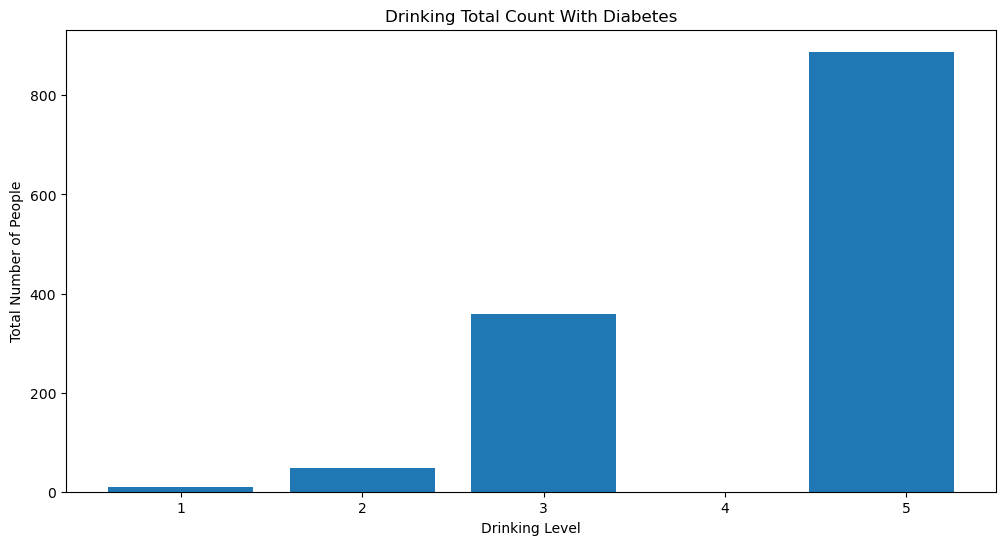

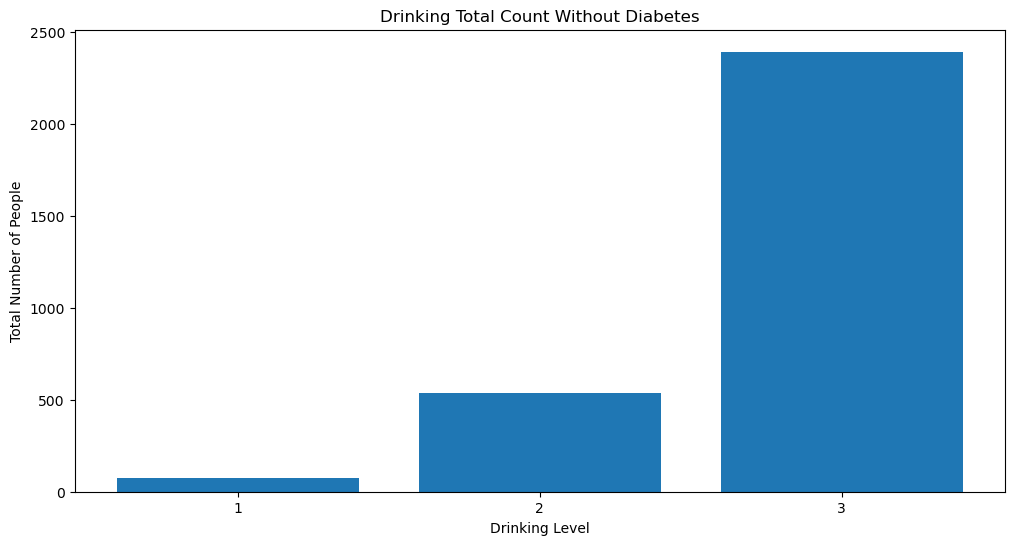

In [61]:
drinking_with_diabetes = diabetes_data[diabetes_data['Diabetes']==1].groupby('drinking').size()

plt.figure(figsize=(12,6))
plt.title('Drinking Total Count With Diabetes')
plt.xlabel('Drinking Level')
plt.ylabel('Total Number of People')
plt.bar(x=drinking_with_diabetes.index,height=drinking_with_diabetes.values)

drinking_without_diabetes = diabetes_data[diabetes_data['Diabetes']==0].groupby('drinking').size()

plt.figure(figsize=(12,6))
plt.title('Drinking Total Count Without Diabetes')
plt.xlabel('Drinking Level')
plt.ylabel('Total Number of People')
plt.xticks(np.arange(0, max(drinking_without_diabetes.values) + 1, 1))
plt.bar(x=drinking_without_diabetes.index,height=drinking_without_diabetes.values)

Similar to smoking, there appears to be null filled values not matching what we would be expecting. This could cause extreme overfitting and as a result cannot use this feature as well. 

### Family History With Diabetes

<BarContainer object of 2 artists>

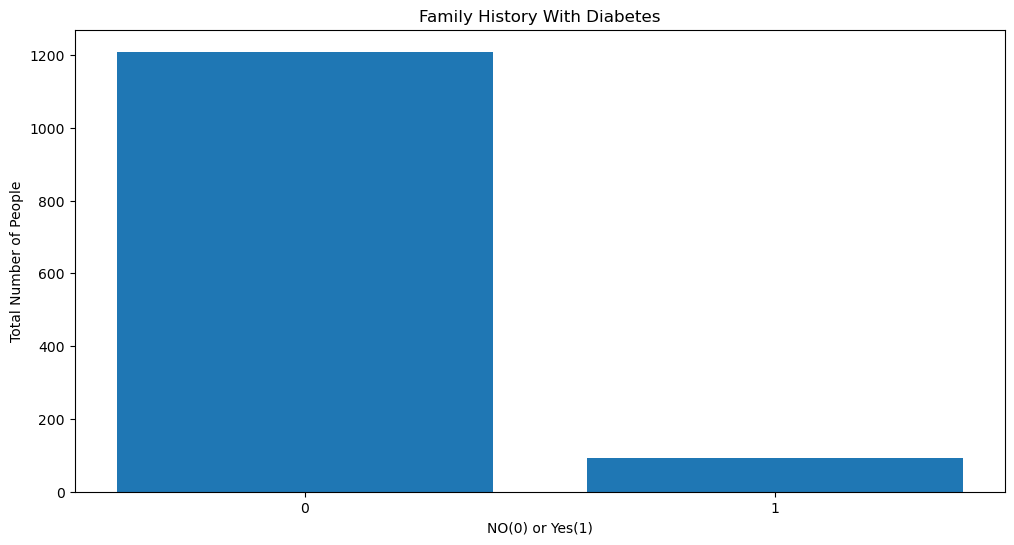

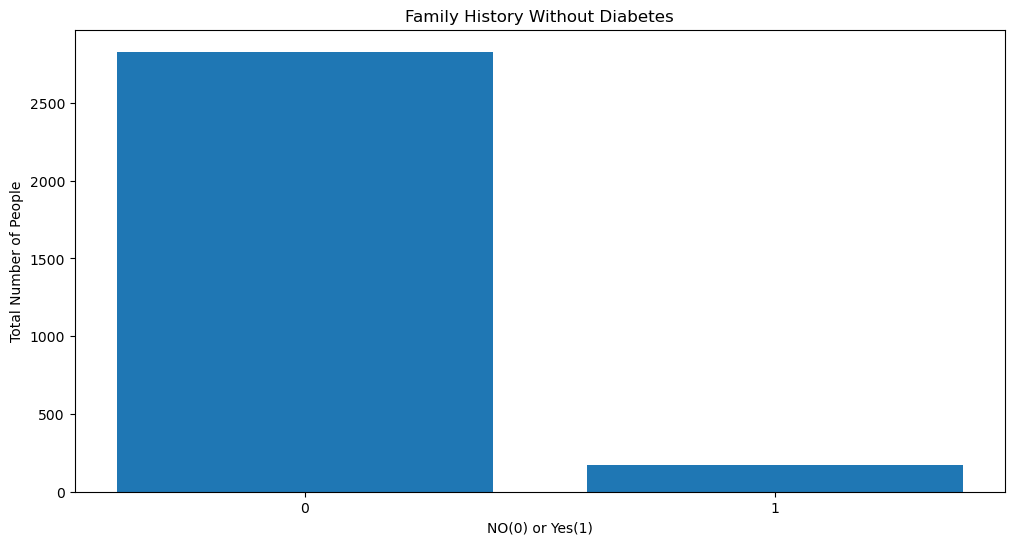

In [64]:
family_history_with_diabetes = diabetes_data[diabetes_data['Diabetes']==1].groupby('family_histroy').size()

plt.figure(figsize=(12,6))
plt.title('Family History With Diabetes')
plt.xlabel('NO(0) or Yes(1)')
plt.ylabel('Total Number of People')
plt.xticks(np.arange(0, max(family_history_with_diabetes.values) + 1, 1))
plt.bar(x=family_history_with_diabetes.index,height=family_history_with_diabetes.values)

family_history_without_diabetes = diabetes_data[diabetes_data['Diabetes']==0].groupby('family_histroy').size()

plt.figure(figsize=(12,6))
plt.title('Family History Without Diabetes')
plt.xlabel('NO(0) or Yes(1)')
plt.ylabel('Total Number of People')
plt.xticks(np.arange(0, max(family_history_without_diabetes.values) + 1, 1))
plt.bar(x=family_history_without_diabetes.index,height=family_history_without_diabetes.values)

We see a similar trend between peoples family history with diabetes between individuals with and without diabetes. As a result, we cannot use this feature as well since it appears to be no significance for people with and without diabetes.

# Classification Predictive Models

### Setup

In [68]:
y = diabetes_data.Diabetes
diabetes_features = ['SBP','DBP','FPG','HDL','LDL','FFPG']
X = diabetes_data[diabetes_features]

from sklearn.model_selection import train_test_split
# random_state=42 to reduce randomness
train_X, val_X, train_y, val_y = train_test_split(X,y,train_size=.8, random_state=42)

### Decision Tree Model

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

diabetes_model_tree = DecisionTreeClassifier(random_state=42)
diabetes_model_tree.fit(train_X,train_y)
val_predictions = diabetes_model_tree.predict(val_X)

print('Accuracy: %.3f' % accuracy_score(val_predictions, val_y))
print('Recall Score: %.3f' % recall_score(val_predictions, val_y))
print('Precision Score: %.3f' % precision_score(val_predictions, val_y))
print('F1 Score: %.3f' % f1_score(val_predictions, val_y))

Accuracy: 0.849
Recall Score: 0.717
Precision Score: 0.747
F1 Score: 0.731


With a regular accuracy of about 85%, our decision tree on the surface appears to be alright. However, when we look at some of the advanced statistics, we see this model falls flat on its face. With a recall score of 71.7%, we are simply not identifying the positive cases like you would hope. Recall is our ability to capture someone with diabetes and label them as diabetic. Out of our test sample, we correctly labeled 71.7% of people with diabetes as diabetic. This is scary when you think that 28.3% of our test was labeled as not diabetic when in fact they are. When it comes to our model, missing someone being diabetic can be potentially more life threatening then mislabeling one as diabetic. This is why for us recall might hold more weight then precision. Precision tells us how accurate we are at labeling someone at diabetic who truly is. At a score of 74.7%, that means that about 75% of people who we labeled as diabetic actually are. Now the reason precision is not as serious is because if we label someone as diabetic and it turns out they actually arent, there is no harm in getting that treatment. The harm could come in mislabeling them, and the individual actually has something else and we are neglecting it. But if the goal is to ensure that nobody dies from diabetes, this score is not as important. Of course, in the real world we don't want to go around labeling everyone as diabetic, otherwise our recall would be 100% but precision extremely low. This is why we have the F1 Score. The F1 score balances out recall and precision to find a more accurate count of our ability to label someone as diabetic. As a result, with an F1 score of 73.1%, we can say that our decision tree is just not accurate enough for practical use. 

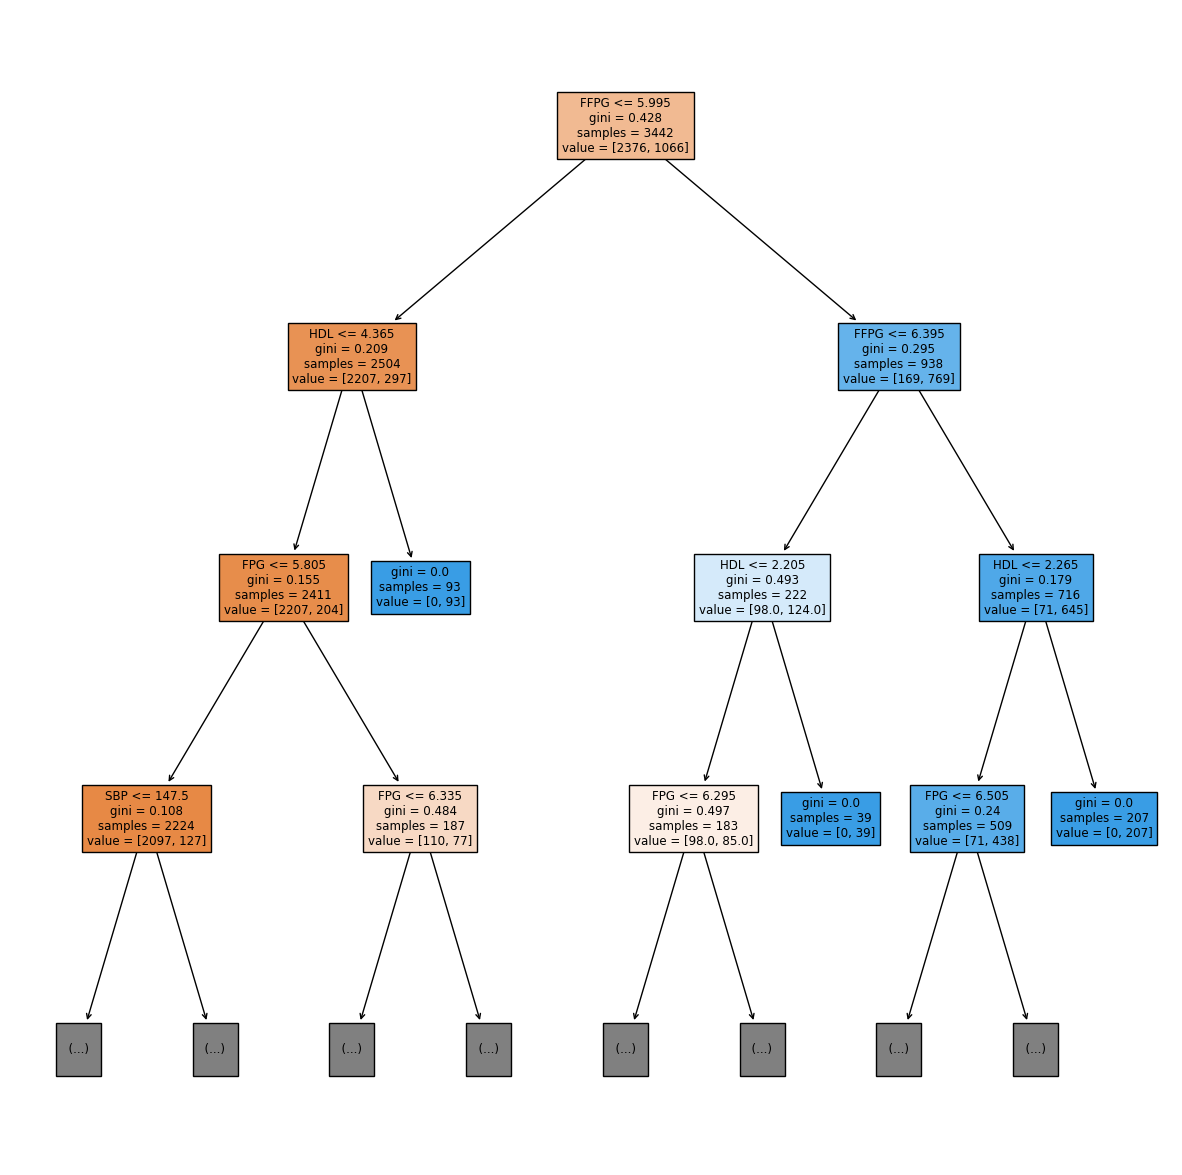

In [72]:
# Inspired code from 
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(diabetes_model_tree, max_depth=3, feature_names = X. columns, filled = True)
plt.show()

We see from the graph that this model values FFPG and HDL the most for predicting if one is diabetic or not. From these first three rows, we see the ability to quickly rull out if someone has diabetes based on those two features. Then we start to see SBP and FPG levels come in to start picking through the smaller data. This makes sense when looking at our data from earlier. As HDL has a stark difference between those who are and are not diabetic. So did LDL however, so have to wonder when does that decison making come up.

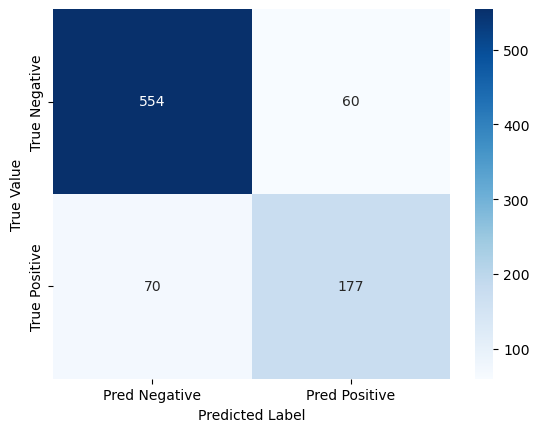

In [74]:
from sklearn.metrics import confusion_matrix
spread = confusion_matrix(val_predictions, val_y)
sbn.heatmap(spread,annot=True,fmt='d',cmap='Blues',xticklabels=['Pred Negative', 'Pred Positive'], yticklabels=['True Negative', 'True Positive'])
plt.ylabel('True Value')
plt.xlabel('Predicted Label')
plt.show()

From this visualization we can see what those scores earlier were explaining. We see that we missed 70 diabetic people. This could be very dangerous as not labeling someone as diabetic who is could keep necessary medicine like insulin away from them. We also see we mislabeled 60 people as diabetic. This would also not be beneficial as assuming one is diabetic who actually isnt means we could be witholding the medication and resources they truly require. However, for immediate classification on labeling one as diabetic, we are missing a large group. Further proving that for practical use a decision tree would not be the way to go.

### Random Forest Model

In [77]:
from sklearn.ensemble import RandomForestClassifier
# create the random forest and fit the data to it
diabetes_model_randomforest = RandomForestClassifier(random_state=42)
diabetes_model_randomforest.fit(train_X, train_y)
# attempt to predict and save those predictions
randomforest_predictions = diabetes_model_randomforest.predict(val_X)
#find the accuracy for the model
print('Accuracy: %.3f' % accuracy_score(randomforest_predictions, val_y))
print('Recall Score: %.3f' % recall_score(randomforest_predictions, val_y))
print('Precision Score: %.3f' % precision_score(randomforest_predictions, val_y))
print('F1 Score: %.3f' % f1_score(randomforest_predictions, val_y))

Accuracy: 0.906
Recall Score: 0.861
Precision Score: 0.785
F1 Score: 0.821


With an overall accuracy of 90.6%, we see a potential immediate boost in potential use of this model. Our recall is also much better. At a score of 86.1%, we are missing far less diabetic people then in the previous model. The precision score is also a few points higher, meaning we are not false labeling as many people as the previous model. However, we see there is a pretty good gap between recall and precision. This gap could suggest that we are over guessing that one person has diabetes. With a F1 Score of 82.1%, we find our more logical accuracy on labeling a diabetic peoson as diabetic. Being about 9 points higher then our decision tree model, we would use the random forest model before our decision tree model. Being above 80% as well, this model would get a grade of good in terms of practical use, where good is .8-.9 and excellant is >.9. 

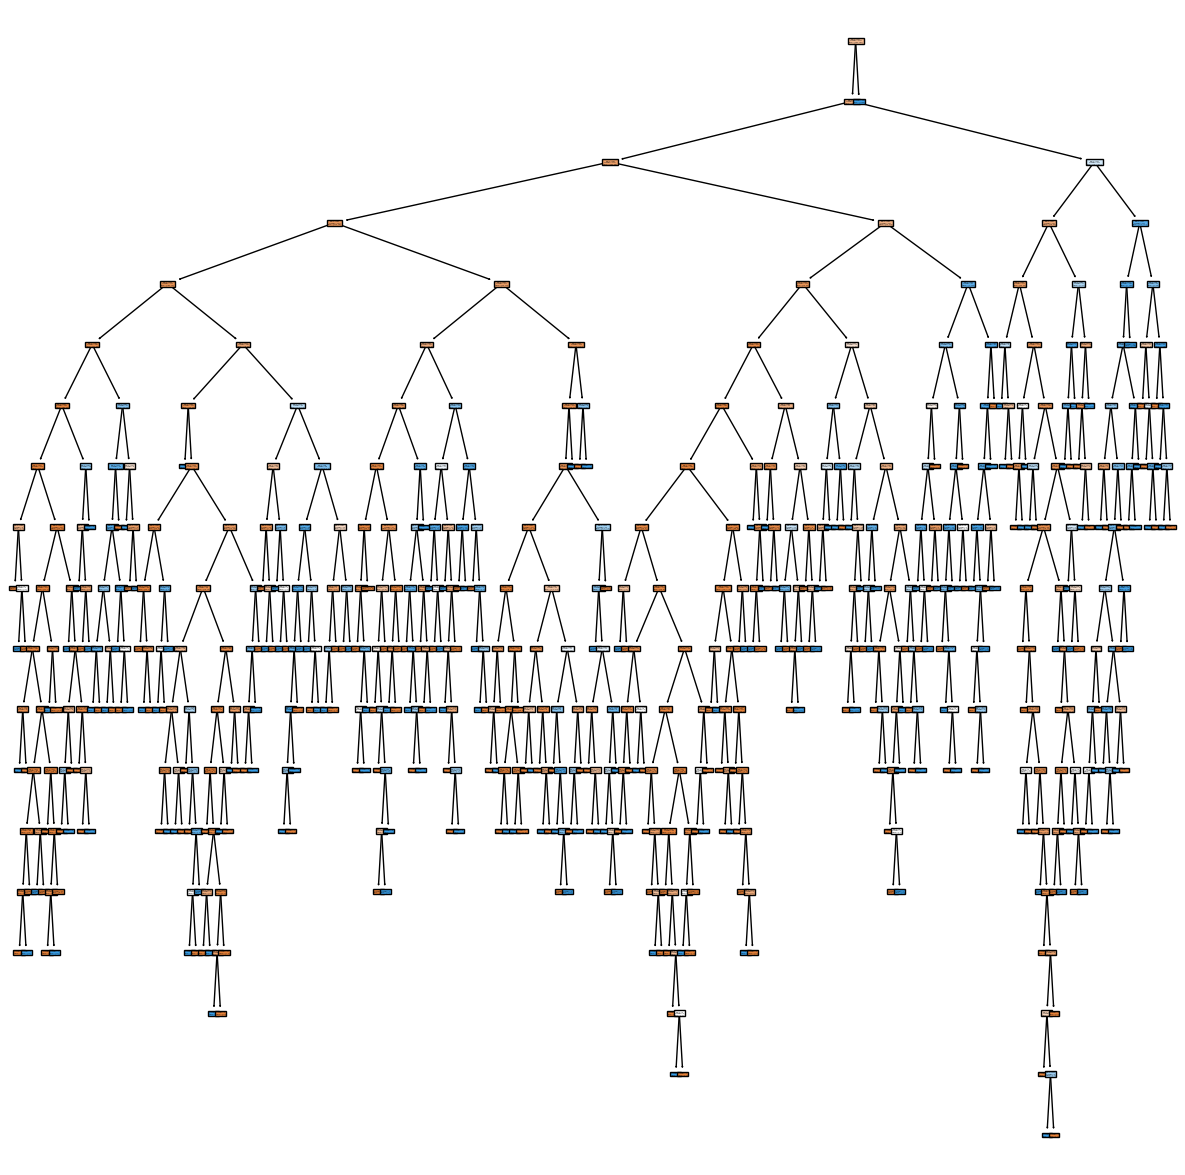

In [79]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(diabetes_model_randomforest[0], feature_names = X.columns, filled=True)
plt.show()

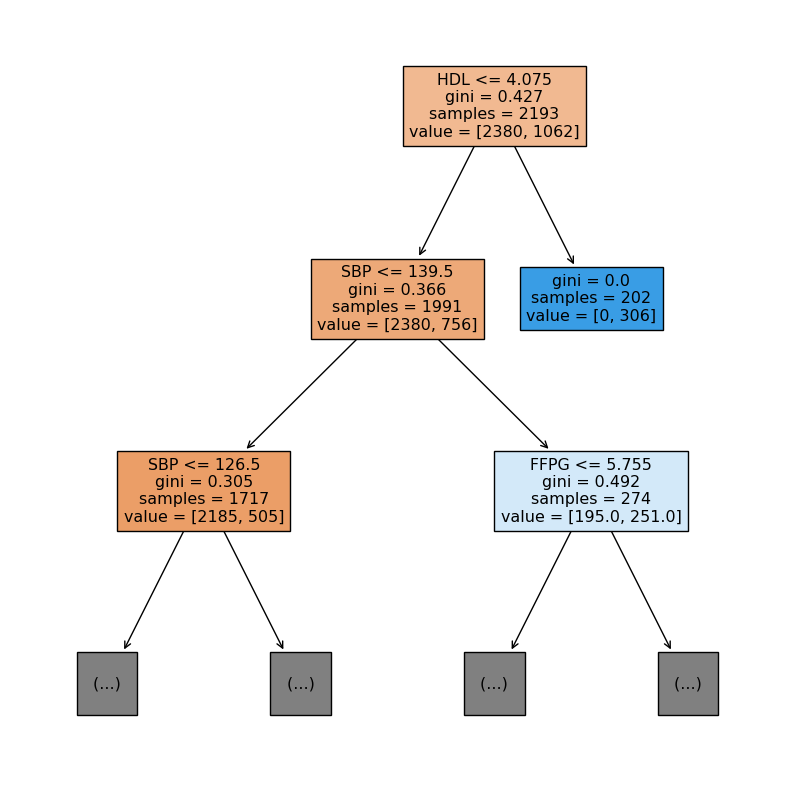

In [80]:
plt.figure(figsize=(10,10))
plot_tree(diabetes_model_randomforest[0], feature_names = X.columns, filled=True,max_depth=2)
plt.show()

We see how insanely massive 1 mere tree is for the random forest model. Whats crazy is that this is one tree, and based on the length of our model it produced 100 unique trees. With this first tree, we its first node is actually the HDL feature, different from the decision tree. Then SBP in the second row, then finally the FFPG feature gets addressed in the third row. The random forest model works by creating an x amount of unique trees, each time using different features in different depths with different comparison values that can help optimize its performance. Then when it predicts, each tree runs and produces a prediction and it votes on what majority of the trees predict. This allows not one feature to over rule and instead let all features relevant weigh in and provide a voice.

In [82]:
print(len(diabetes_model_randomforest))

100


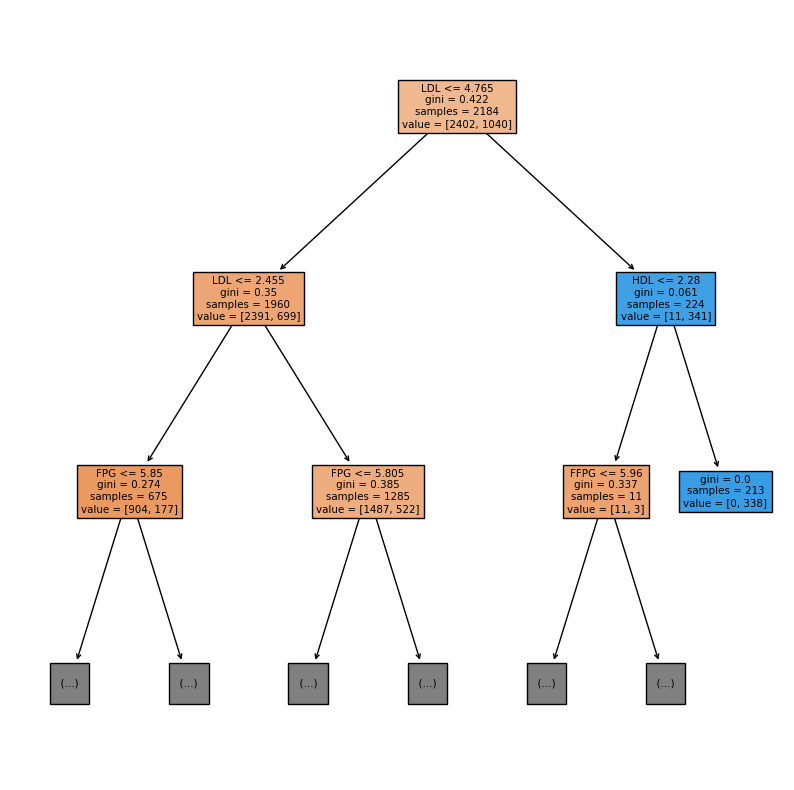

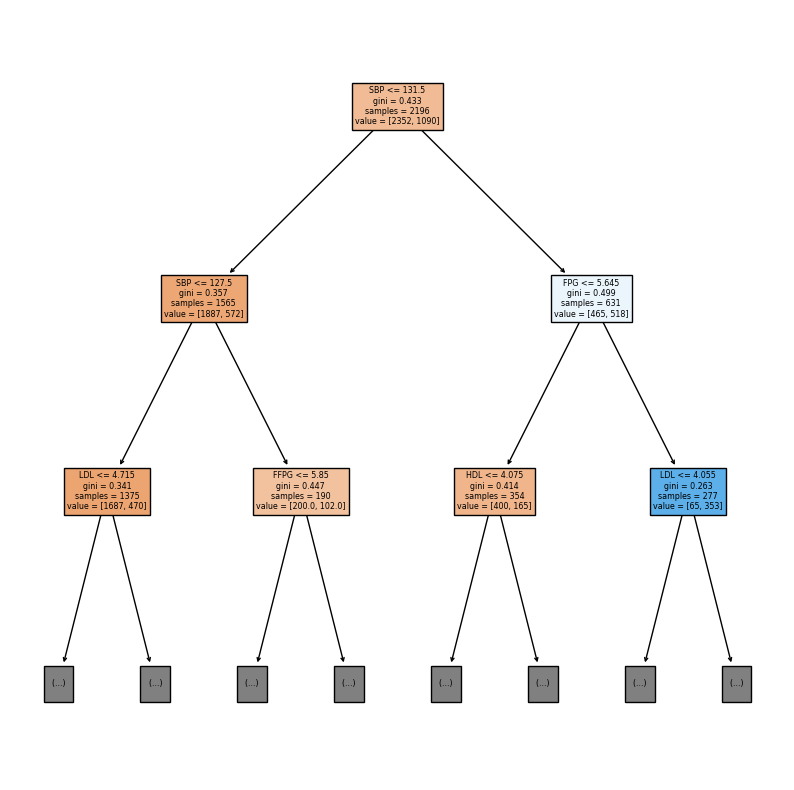

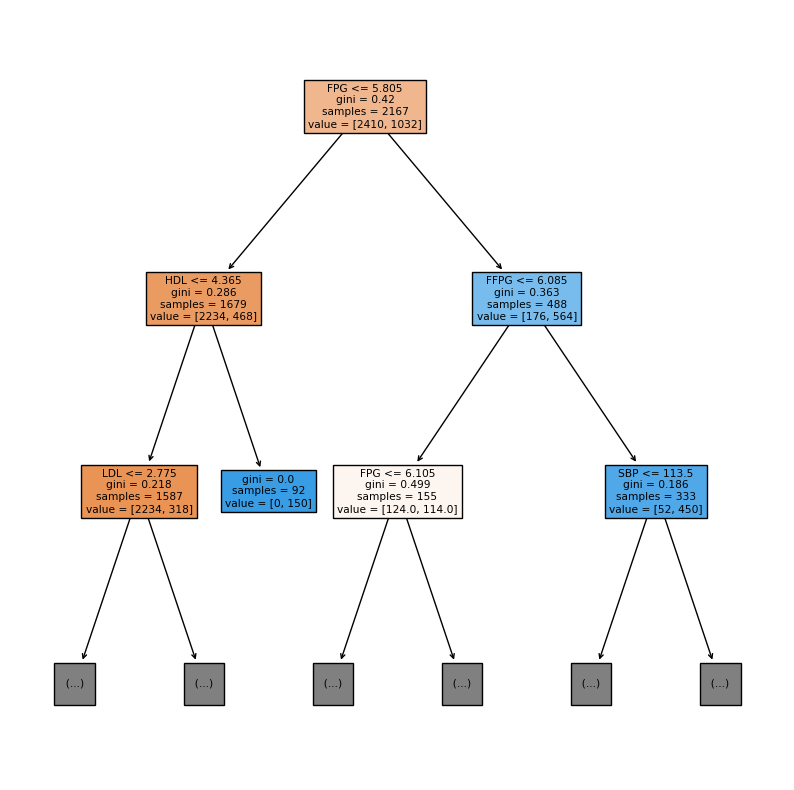

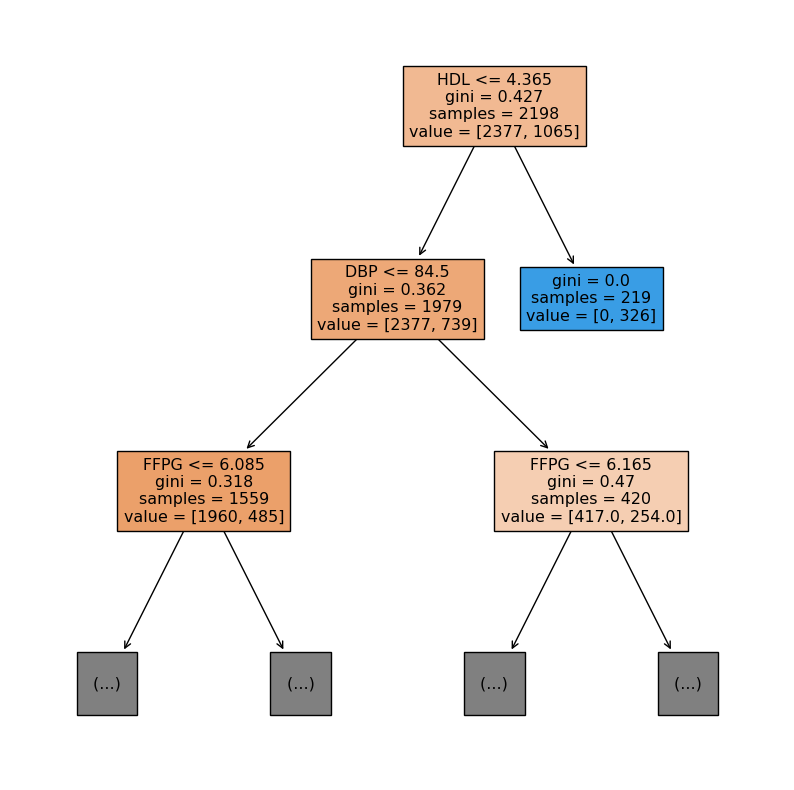

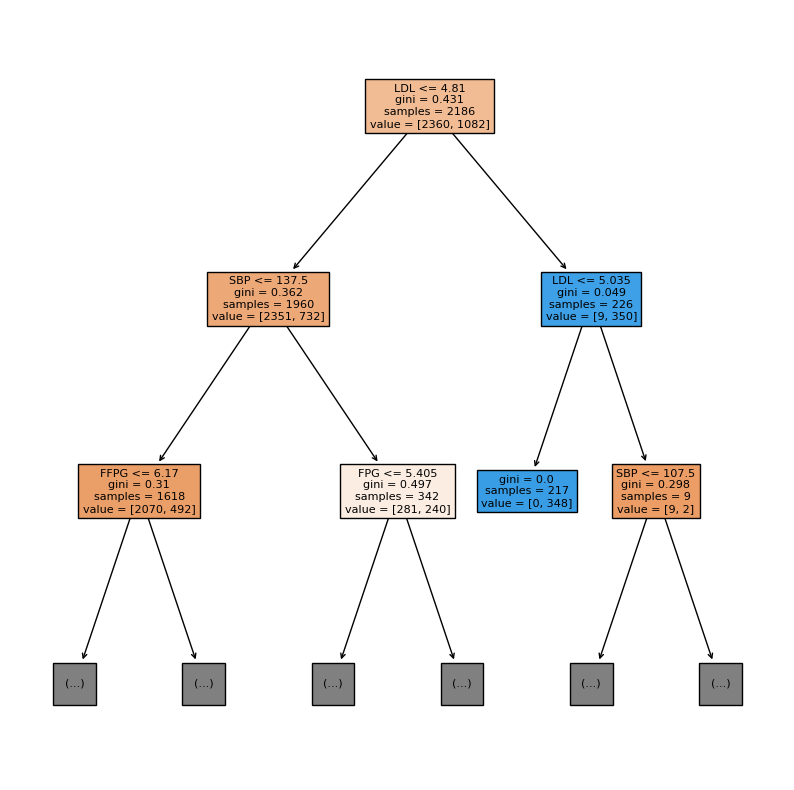

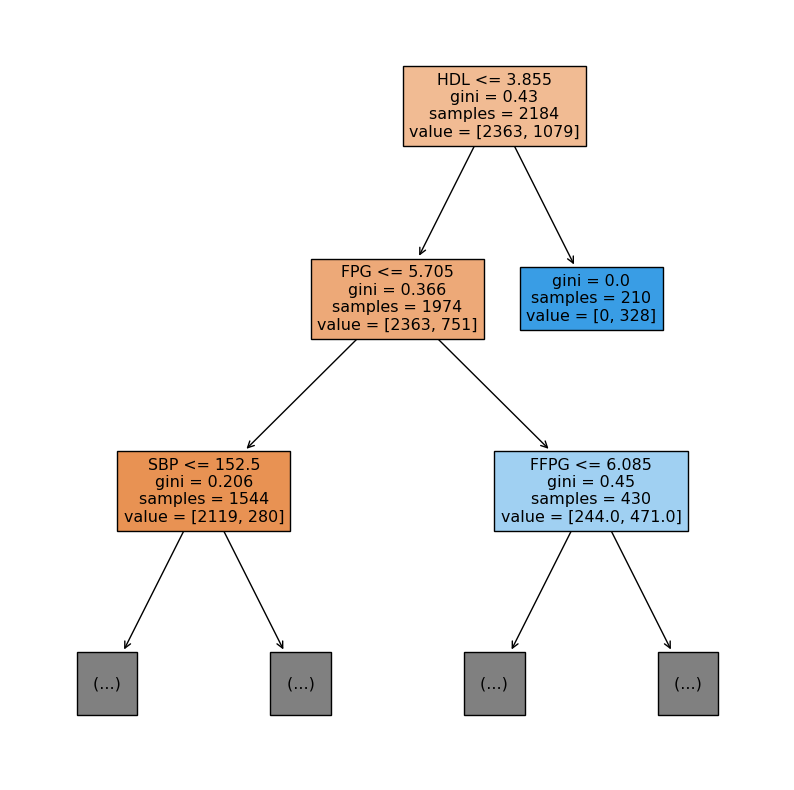

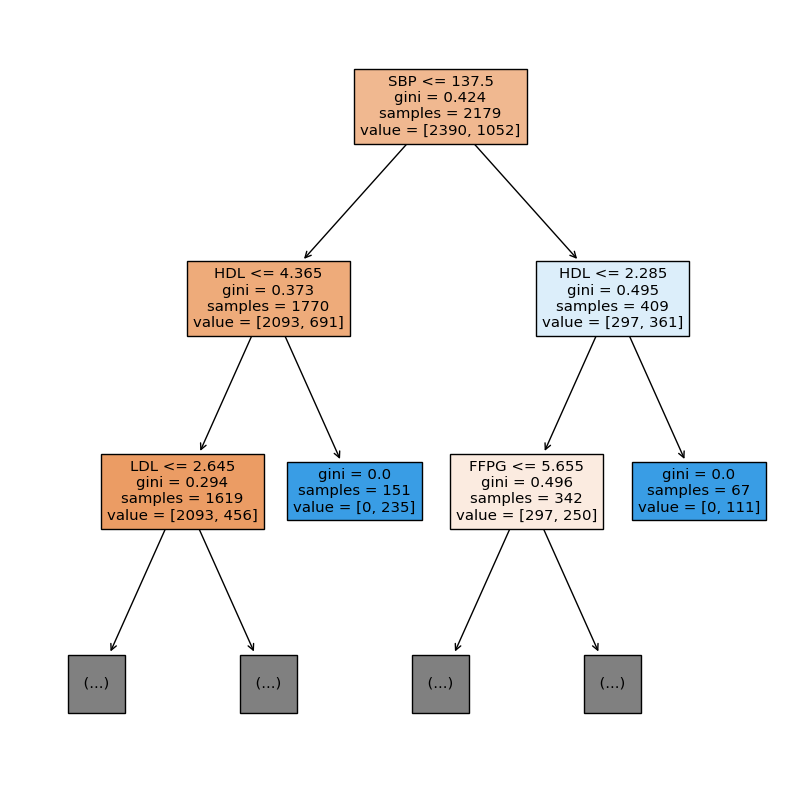

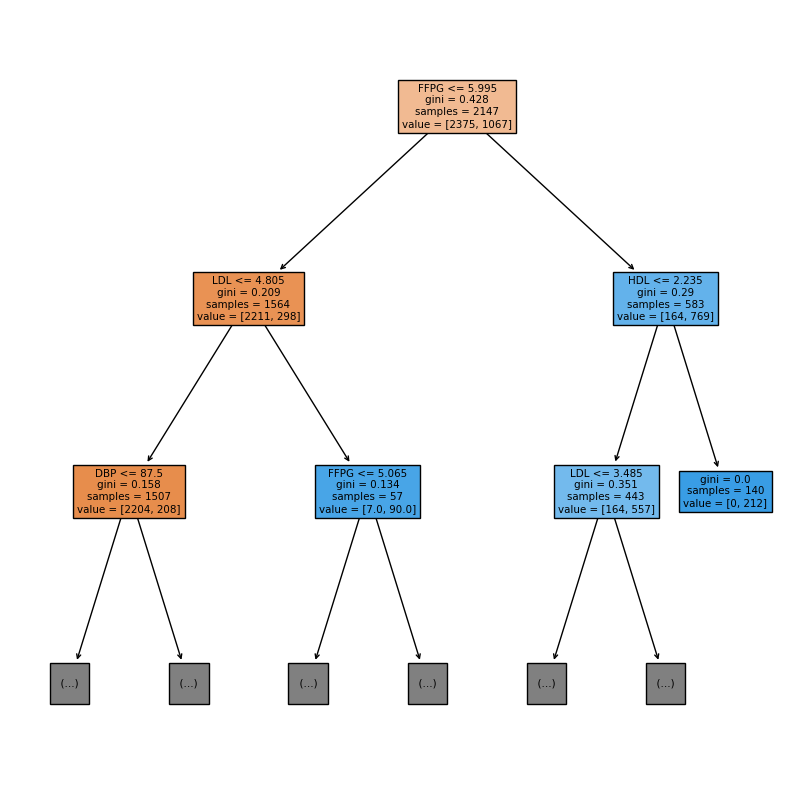

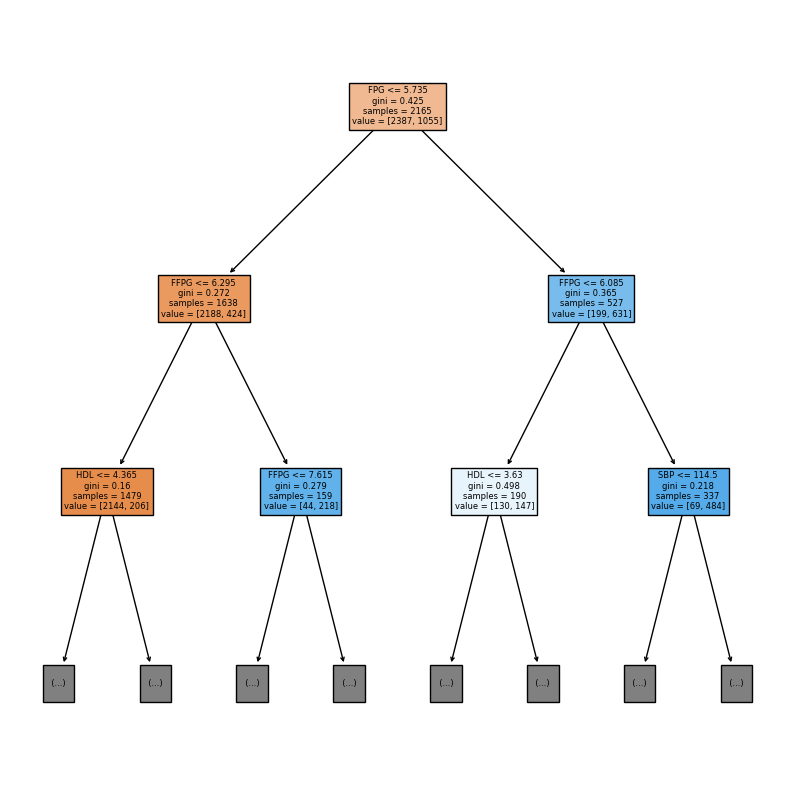

In [83]:
for i in range(9):
    plt.figure(figsize=(10,10))
    plot_tree(diabetes_model_randomforest[(i+1)*10], feature_names = X.columns, filled=True,max_depth=2)
    plt.show()

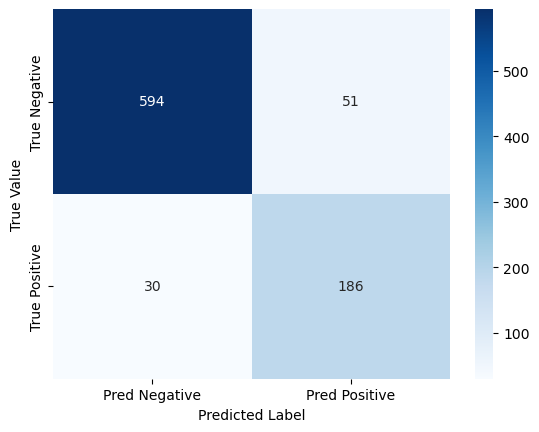

In [84]:
randomforest_spread = confusion_matrix(randomforest_predictions, val_y)
sbn.heatmap(randomforest_spread,annot=True,fmt='d',cmap='Blues',xticklabels=['Pred Negative', 'Pred Positive'], yticklabels=['True Negative', 'True Positive'])
plt.ylabel('True Value')
plt.xlabel('Predicted Label')
plt.show()

Just off this visualization we see that less diabetic people are being missed. Also that there are slighty less false negatives. By missing less of our test case, in the medical world we making sure more people who need to be treated as a diabetic are getting their care. And with less false negatives, we are treating not treating people as diabetic who actually arent. All in all, this model shows the increase in our ability to correctly label one as diabetic or not.

### Logistic Regression

In [87]:
# got idea for model setup from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

#max_iterations = 1000 so that model could converge
diabetes_lrmodel = LogisticRegression(random_state=42,max_iter=1000)
diabetes_lrmodel.fit(train_X,train_y)

lrmodel_predictions = diabetes_lrmodel.predict(val_X)

print('Accuracy: %.3f' % accuracy_score(lrmodel_predictions, val_y))
print('Recall Score: %.3f' % recall_score(lrmodel_predictions, val_y))
print('Precision Score: %.3f' % precision_score(lrmodel_predictions, val_y))
print('F1 Score: %.3f' % f1_score(lrmodel_predictions, val_y))

Accuracy: 0.901
Recall Score: 0.888
Precision Score: 0.734
F1 Score: 0.804


The logistic model as an overall accuracy pretty similar to our random forest model. Its overall accuracy is merely .005 points less. Its recall score is actually about 2.5 points higher then the random forest model, suggesting that we are missing less diabetic people in our model. However, our precision score is lower which in turn suggests that we are over labeling people as diabetic who are not. All in all is causes for a slightly lower F1 score, insinuating that this model is not as strong as our random forest model.

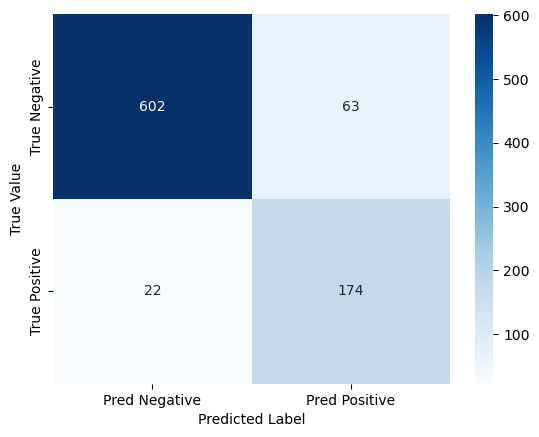

In [89]:
logistic_spread = confusion_matrix(lrmodel_predictions, val_y)
sbn.heatmap(logistic_spread,annot=True,fmt='d',cmap='Blues',xticklabels=['Pred Negative', 'Pred Positive'], yticklabels=['True Negative', 'True Positive'])
plt.ylabel('True Value')
plt.xlabel('Predicted Label')
plt.show()

We see from this visualization that there is indeed a lower amount of diabetic people labeled as non diabetic. This is huge because as stated more diabetic people are recieving the care that they need. However, we see and increase in the amount of false positive labels, meaning that these individuals could be diagnosed and treated with something they are not, whcih could impact them down the road if they need another diagnoses to potentially help solve an issue.